# Analyzing Freddie Mac Single Family Loans

## Abstract
The Federal Home Loan Mortgage Corporation (FHLMC), known as Freddie Mac, is a public government-sponsored enterprise which was created to expand the secondary market for mortgages in the United States. Freddie Mac buys mortgages on the secondary market, pools them, and sells them as a mortgage-backed security to investors on the open market. This secondary mortgage market increases the supply of money available for mortgage lending and increases the money available for new home purchases.
<br>
<br>
For example, when your typical American family of 4 purchases a home, they need to exchange money with the seller. More often than not, the family does not have [650,000 USD](https://la.curbed.com/2018/7/24/17608186/los-angeles-median-home-price-june-core-logic) on-hand to pay to the seller. However, they are able to afford by taking out a loan from a bank and making monthly payments over 15-30 years. The amount of each monthly payment is [calculated](https://www.calculator.net/finance-calculator.html) by the loan length, amount, and the interest rate. From a top-down view, the interest rate on that loan is mainly influenced by The Federal Reserve's manipulation of the [Federal Funds Rate](https://en.wikipedia.org/wiki/Federal_funds_rate) (but we won't cover that now) & a combination of other factors, including but not limited to: the individual consumer's credit score, home price & location, down payment, and the loan & interest rate types. Now back to the bank, whom has agreed to lend the family a specified amount for a specified period and now finds itself without that money in its reserves. If a bank doesn't have money to lend, how can it function? Enter Freddie Mac who then buys the rights to the family's loan, thereby giving the bank the capital it needs. Freddie Mac does this thousands & thousands of times, pooling the mortgages to then sell to investors. This way, the family can make monthly payments and live in their home and the bank can continue to have capital to lend. Broadly speaking, you could say investors in these pooled investments are the actual owners of the family's loan, NOT the bank! Much like the equity market, investors in mortgage-backed-securities can see the value of their investment rise or fall. These mortgage "pools" one can invest in can be grouped by credit quality, geographic location, value, etc. If for example, there is a local recession in Dallas, TX. Homeowners lose work & cannot make their monthly loan payments. The investor whom bought the Dallas-pool will see the value of their investment fall. Likewise, if the real-estate market & general economy in Charleston, SC is booming, the pooled-South Carolina MBS portfolio will appreciate in value. I'd like to add in there are many other reasons for an increase/decrease in value and my example should be considered limited. Please see [here](http://people.stern.nyu.edu/igiddy/ABS/absmbs.pdf) and [here](https://www.federalreserve.gov/econresdata/feds/2016/files/2016031pap.pdf) for a further intro.

## The Motivation
Freddie Mac and Fannie Mae as a GSE & with the implicit guarantee of US government-backing, was able to generate huge profits prior to the 2007 financial crisis. Investment banks created financial products through [securitization](https://www.imf.org/external/pubs/ft/fandd/2008/09/pdf/basics.pdf) in an attempt to share in the mortgage market profits & sold these to investors such as pension & hedge funds, foreign governments, and insurance companies. As Freddie Mac & Fannie Mae began losing monopoly status as a result of these securitized products, the GSEs increased their purchases of subprime loans (those with low credit quality), all with the backing of the federal government. As housing prices began to peak, home equity fell, and Freddie Mac/Fannie Mae began experiencing large credit-related losses in their subprime positions. Sell-offs ensued and this triggered the global financial crisis. <br>
<br>
Whether as an investor or a lending institution, it becomes prudent to conduct proper diligence on the strength of underlying assets within any financial product. For American employees with x% of their bi-weekly paycheck withheld to be invested in a retirement plan, it can be difficult to ascertain the true nature of the value of their retirement portfolio, especially when linked (though indirectly), to products with hundreds of thousands of underlying individual assets (single family homes). This project aims to provide transparency to single-family home loans and will examine, through supervised-learning models, the strength of the of the U.S. mortgage market. 

## The Data
At the direction of its regulator, the Federal Housing Finance Agency (FHFA), Freddie Mac has made the Single Family Loan-Level Dataset (the "Dataset") available as part of a larger effort to increase transparency and help investors build mre accurate credit performance models in support of ongoing and future credit risk-sharing transactions. The Dataset includes: <br>
1. Loan-level origination, monthly loan performance, and actual loss data on a portion of the fully amortizing 30-year fixed-rate Single Family mortgages that Freddie Mac acquired with origination dates from 1999 to the Origination Cutoff Date. 
2. Loan-level origination, monthly loan performance, and actual loss data on a portion of the fully amortizing 15- and 20-year fixed-rate Single Family mortgages that Freddie Mac acquired with origination dates from January 1, 2005, to the Origination Cutoff Date. 
Loan performance information in the Dataset includes the monthly loan balance, delinquency status and certain information up to and including the earliest of the following termination events: <br>
    a. Prepaid or Matured (voluntary Payoff) <br>
    b. Foreclosure Alternative Group (Short Sale, Third Party Sale, Charge Off or Note Sale) <br>
    c. Repurchase prior to Property Disposition. <br>
    d. REO Disposition <br>

### Single Family Loan-Level Dataset Sample
Freddie Mac has created a smaller dataset which is a simple random sample of 50,000 loans selected from each full vintage year and a proportionate nubmer of loans from each partial vintage year of the full Single Family Loan-Level Dataset. Each vintage year has one origination data file and one corresponding monthly performance data file, containing the same loan-level data fields as those included in the full Dataset.

## Hypothesis
The outcome of missed payments on housing loans at the time of loan origination can be statistically modeled and predicted as a function of the applicant's financial status, conditions within the overall economy, and other loan-specific features.

## Dataset Characteristics (merged file)
Time period: 1999 to 2016
<br>Number of loans: 900,000
<br>Features:
* Loan ID
* Loan Delinquency Status
* Credit Score
* Interest Rate
* Loan-to-Value Ratio
* Debt-to-Income Ratio
* Combined Loan-to-Value Ratio
* Unpaid Principal Balance
* Mortgage Insurance Percentage
* Purpose of Loan
* Number of Units in Loan
* Occupancy Status
* Number of Borrowers per Loan
* First-Time Homebuyer Flag
* Super-Conforming Flag
* Prepayment Penalty Flag
* State (geographic)
* Property Type
* Loan Channel
* Loan Seller
* Loan Servicer
* Term of Loan
* Maturity Date
* First Payment Date

# Initial Data Import & Treatment
Origination and performance data must be downloaded individually by year from the Freddie Mac website. <br>
<br>
Format as follows: <br>
sample_orig_YYYY.txt --> origination data <br>
sample_svcg_YYYY.txt --> monthly performance data <br>
<br>
Both origination and performance files share the common "loan sequence number" which serves as the unique loan identifier. The "loan sequence number" includes the year and quarter (Q1, Q2, etc) of loan origination. The performance file shows monthly performance for each loan, thus there are multiple rows (month1, month2, etc) corresponding to each "loan sequence number". There are multiple null values and data-types within the datasets, and the data is considered "living", meaning it is subject to change as Freddie Mac receives & updates to their housing loan profiles.

In [1]:
# Import Modules:
import time
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Aesthetics.
%matplotlib inline

# Suppressing "Future Warning"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load raw files.
orig1999 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_1999.txt', sep='|', header=None, low_memory=False)
orig2000 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2000.txt', sep='|', header=None, low_memory=False)
orig2001 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2001.txt', sep='|', header=None, low_memory=False)
orig2002 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2002.txt', sep='|', header=None, low_memory=False)
orig2003 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2003.txt', sep='|', header=None, low_memory=False)
orig2004 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2004.txt', sep='|', header=None, low_memory=False)
orig2005 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2005.txt', sep='|', header=None, low_memory=False)
orig2006 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2006.txt', sep='|', header=None, low_memory=False)
orig2007 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2007.txt', sep='|', header=None, low_memory=False)
orig2008 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2008.txt', sep='|', header=None, low_memory=False)
orig2009 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2009.txt', sep='|', header=None, low_memory=False)
orig2010 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2010.txt', sep='|', header=None, low_memory=False)
orig2011 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2011.txt', sep='|', header=None, low_memory=False)
orig2012 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2012.txt', sep='|', header=None, low_memory=False)
orig2013 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2013.txt', sep='|', header=None, low_memory=False)
orig2014 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2014.txt', sep='|', header=None, low_memory=False)
orig2015 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2015.txt', sep='|', header=None, low_memory=False)
orig2016 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2016.txt', sep='|', header=None, low_memory=False)

perf1999 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_1999.txt', sep='|', header=None, low_memory=False)
perf2000 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2000.txt', sep='|', header=None, low_memory=False)
perf2001 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2001.txt', sep='|', header=None, low_memory=False)
perf2002 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2002.txt', sep='|', header=None, low_memory=False)
perf2003 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2003.txt', sep='|', header=None, low_memory=False)
perf2004 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2004.txt', sep='|', header=None, low_memory=False)
perf2005 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2005.txt', sep='|', header=None, low_memory=False)
perf2006 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2006.txt', sep='|', header=None, low_memory=False)
perf2007 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2007.txt', sep='|', header=None, low_memory=False)
perf2008 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2008.txt', sep='|', header=None, low_memory=False)
perf2009 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2009.txt', sep='|', header=None, low_memory=False)
perf2010 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2010.txt', sep='|', header=None, low_memory=False)
perf2011 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2011.txt', sep='|', header=None, low_memory=False)
perf2012 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2012.txt', sep='|', header=None, low_memory=False)
perf2013 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2013.txt', sep='|', header=None, low_memory=False)
perf2014 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2014.txt', sep='|', header=None, low_memory=False)
perf2015 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2015.txt', sep='|', header=None, low_memory=False)
perf2016 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2016.txt', sep='|', header=None, low_memory=False)

In [3]:
# Setting header names & apply.
orig_cols = ['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag', 'maturityDate',
                   'metroArea', 'miPercentage', 'numberOfUnits',
                   'occupancyStatus', 'cltvRatio', 'dtiRatio', 'upb',
                   'ltvRatio', 'interestRate', 'channel', 'ppmFlag', 'productType',
                   'propertyState', 'propertyType', 'postalCode', 'lsn',
                   'loanPurpose', 'originalLoanTerm', 'numberOfBorrowers', 'sellerName',
                   'servicerName', 'superConformingFlag'] # 'pre-HarpLoanSequenceNumber'

perf_cols = ['lsn', 'monthlyReportingPeriod', 'currentActualUpb',
                 'dlq', 'loanAge', 'remainMthsToMaturity', 'repurchaseFlag',
                 'modificationFlag', 'zeroBalCode', 'zeroBalEffDate', 'currentIntRate',
                 'curDeferredUpb', 'ddlpi', 'miRecov', 'netSalesProceeds', 'nonMiRecov',
                 'expenses', 'legalCosts', 'maintPreservationCosts', 'taxesInsurance',
                 'miscExpenses', 'actualLossCalc', 'modificationCost',
                 'stepModificationFlag', 'deferredPaymentModification']

orig1999.columns = orig_cols
orig2000.columns = orig_cols
orig2001.columns = orig_cols
orig2002.columns = orig_cols
orig2003.columns = orig_cols
orig2004.columns = orig_cols
orig2005.columns = orig_cols
orig2006.columns = orig_cols
orig2007.columns = orig_cols
orig2008.columns = orig_cols
orig2009.columns = orig_cols
orig2010.columns = orig_cols
orig2011.columns = orig_cols
orig2012.columns = orig_cols
orig2013.columns = orig_cols
orig2014.columns = orig_cols
orig2015.columns = orig_cols
orig2016.columns = orig_cols

perf1999.columns = perf_cols
perf2000.columns = perf_cols
perf2001.columns = perf_cols
perf2002.columns = perf_cols
perf2003.columns = perf_cols
perf2004.columns = perf_cols
perf2005.columns = perf_cols
perf2006.columns = perf_cols
perf2007.columns = perf_cols
perf2008.columns = perf_cols
perf2009.columns = perf_cols
perf2010.columns = perf_cols
perf2011.columns = perf_cols
perf2012.columns = perf_cols
perf2013.columns = perf_cols
perf2014.columns = perf_cols
perf2015.columns = perf_cols
perf2016.columns = perf_cols

In [4]:
# Merge origination files.
frames_orig = [orig1999, orig2000, orig2001, orig2002, orig2003, orig2004,
               orig2005, orig2006, orig2007, orig2008, orig2009, orig2010,
               orig2011, orig2012, orig2013, orig2014, orig2015, orig2016]
orig_combined = pd.concat(frames_orig)
print(orig_combined.shape)
orig_combined.head()

(900000, 26)


,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,propertyState,propertyType,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag
0,799,199903,N,202901,37620.0,0,1,P,70,25,...,WV,SF,26100.0,F199Q1000012,N,359,1,Other sellers,Other servicers,NaN
1,635,200212,N,202904,10420.0,0,1,P,76,21,...,OH,SF,44700.0,F199Q1000024,P,317,2,Other sellers,Other servicers,NaN
2,787,199905,N,202904,12060.0,999,1,P,80,18,...,GA,PU,30500.0,F199Q1000036,P,360,2,FT MORTGAGE COMPANIE,CHASEMTGECO,NaN
3,726,199904,N,202903,28140.0,0,1,P,80,37,...,KS,SF,66000.0,F199Q1000060,P,360,2,FLEET MORTGAGE CORPO,Other servicers,NaN
4,748,199905,9,202904,17140.0,999,1,P,80,28,...,OH,SF,45200.0,F199Q1000097,N,360,2,Other sellers,Other servicers,NaN


In [5]:
# Create 'year' column within the merged origination file.
# The loan sequence number 'lsn' is formatted F1YYQnXXXXXX,
# where F1 refers to the product 'Fixed Rate Mortgage',
# YYQn refers to origination year and quarter.

orig_combined['year'] = ['19' + x if x == '99' else '20' + x
                         for x in (orig_combined['lsn'].apply(lambda x: x[2:4]))]
orig_combined.tail()

,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,propertyType,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag,year
49995,808,201701,N,204612,21780.0,0,1,P,80,21,...,SF,47700.0,F116Q4434422,P,360,1,Other sellers,Other servicers,NaN,2016
49996,721,201701,9,204612,35614.0,0,2,P,55,49,...,SF,10400.0,F116Q4434529,C,360,1,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",NaN,2016
49997,716,201710,9,204709,38060.0,0,1,P,66,35,...,PU,85100.0,F116Q4434568,N,360,2,Other sellers,Other servicers,NaN,2016
49998,791,201701,9,204612,37964.0,0,1,I,72,39,...,SF,19000.0,F116Q4434582,P,360,2,Other sellers,Other servicers,NaN,2016
49999,721,201710,9,204709,39340.0,25,1,P,88,40,...,SF,84000.0,F116Q4434621,N,360,2,Other sellers,Other servicers,NaN,2016


In [6]:
# Merge performance files.
frames_perf = [perf1999, perf2000, perf2001, perf2002, perf2003, perf2004,
               perf2005, perf2006, perf2007, perf2008, perf2009, perf2010,
               perf2011, perf2012, perf2013, perf2014, perf2015, perf2016]
perf_combined = pd.concat(frames_perf)
print(perf_combined.shape)
perf_combined.head()

(42282074, 25)


,lsn,monthlyReportingPeriod,currentActualUpb,dlq,loanAge,remainMthsToMaturity,repurchaseFlag,modificationFlag,zeroBalCode,zeroBalEffDate,...,nonMiRecov,expenses,legalCosts,maintPreservationCosts,taxesInsurance,miscExpenses,actualLossCalc,modificationCost,stepModificationFlag,deferredPaymentModification
0,F199Q1000012,200208,42058.58,0,42,317,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,F199Q1000012,200209,42011.81,0,43,316,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,F199Q1000012,200210,41964.77,0,44,315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,F199Q1000012,200211,41917.46,0,45,314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,F199Q1000012,200212,41869.88,0,46,313,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [7]:
perf_combined.columns

Index(['lsn', 'monthlyReportingPeriod', 'currentActualUpb', 'dlq', 'loanAge',
       'remainMthsToMaturity', 'repurchaseFlag', 'modificationFlag',
       'zeroBalCode', 'zeroBalEffDate', 'currentIntRate', 'curDeferredUpb',
       'ddlpi', 'miRecov', 'netSalesProceeds', 'nonMiRecov', 'expenses',
       'legalCosts', 'maintPreservationCosts', 'taxesInsurance',
       'miscExpenses', 'actualLossCalc', 'modificationCost',
       'stepModificationFlag', 'deferredPaymentModification'],
      dtype='object')

In [8]:
# Check deliquency values, we will have to remove whitespace for '0' later.
perf_combined['dlq'].value_counts()

0      40002343
0        830116
1        636091
2        187391
3         87849
4         62556
5         51002
6         42298
7         36019
8         31218
9         27367
R         24696
10        23923
11        20916
12        18565
13        16575
14        14599
15        12923
16        11532
17        10318
18         9283
19         8400
20         7725
21         7061
22         6485
23         6015
24         5496
25         5100
26         4662
27         4362
         ...   
105          11
106          11
107          10
108           9
111           8
109           7
110           7
113           6
112           6
114           5
117           5
116           5
115           5
11            4
118           3
12            3
119           3
120           2
124           2
13            2
121           2
XX            2
122           2
125           1
128           1
127           1
129           1
123           1
14            1
126           1
Name: dlq, Length: 147, 

In [9]:
# Delinquency Status values where XX = Unknown, R = REO Acquistion.
perf_combined['dlq'] = [999 if x == 'R' else x for x in (perf_combined['dlq'].apply(lambda x: x))]
perf_combined['dlq'] = [0 if x == 'XX' else x for x in (perf_combined['dlq'].apply(lambda x: x))]

In [10]:
# Not delinquent ie: '0' adds up including the 2 'XX's.
perf_combined['dlq'].value_counts()

0      40002343
0        830118
1        636091
2        187391
3         87849
4         62556
5         51002
6         42298
7         36019
8         31218
9         27367
999       24696
10        23923
11        20916
12        18565
13        16575
14        14599
15        12923
16        11532
17        10318
18         9283
19         8400
20         7725
21         7061
22         6485
23         6015
24         5496
25         5100
26         4662
27         4362
         ...   
106          11
105          11
9            11
107          10
108           9
111           8
110           7
109           7
112           6
113           6
114           5
116           5
117           5
115           5
11            4
119           3
118           3
12            3
122           2
120           2
124           2
13            2
121           2
127           1
123           1
129           1
14            1
125           1
128           1
126           1
Name: dlq, Length: 146, 

In [11]:
# Combining based on loan sequence number.
orig_combined['is_dlq'] = orig_combined['lsn'].map(
    perf_combined.set_index('lsn')['dlq'].to_dict())
orig_combined.head()

,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag,year,is_dlq
0,799,199903,N,202901,37620.0,0,1,P,70,25,...,26100.0,F199Q1000012,N,359,1,Other sellers,Other servicers,NaN,1999,0
1,635,200212,N,202904,10420.0,0,1,P,76,21,...,44700.0,F199Q1000024,P,317,2,Other sellers,Other servicers,NaN,1999,0
2,787,199905,N,202904,12060.0,999,1,P,80,18,...,30500.0,F199Q1000036,P,360,2,FT MORTGAGE COMPANIE,CHASEMTGECO,NaN,1999,0
3,726,199904,N,202903,28140.0,0,1,P,80,37,...,66000.0,F199Q1000060,P,360,2,FLEET MORTGAGE CORPO,Other servicers,NaN,1999,0
4,748,199905,9,202904,17140.0,999,1,P,80,28,...,45200.0,F199Q1000097,N,360,2,Other sellers,Other servicers,NaN,1999,0


In [12]:
# Renaming dataframe.
merged_df = orig_combined

In [13]:
len(merged_df)

900000

In [14]:
merged_df.columns

Index(['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag',
       'maturityDate', 'metroArea', 'miPercentage', 'numberOfUnits',
       'occupancyStatus', 'cltvRatio', 'dtiRatio', 'upb', 'ltvRatio',
       'interestRate', 'channel', 'ppmFlag', 'productType', 'propertyState',
       'propertyType', 'postalCode', 'lsn', 'loanPurpose', 'originalLoanTerm',
       'numberOfBorrowers', 'sellerName', 'servicerName',
       'superConformingFlag', 'year', 'is_dlq'],
      dtype='object')

In [15]:
# Second check for nulls.
print('nulls before:', merged_df['is_dlq'].isnull().sum())

# Fill NaNs.
merged_df['is_dlq'] = merged_df['is_dlq'].fillna(0)
print('nulls after:', merged_df['is_dlq'].isnull().sum())

nulls before: 12534
nulls after: 0


In [16]:
# Let's come back to the whitespace.
# Per the Freddie Mac manual on delinquency status:
#    0 = Current, or less than 30 days past due.
#    1 = 30-59 days delinquent.
#    2 = 60-89 days delinquent & so on...
#    Space (3) = Unavailable
#    XX = Unknown

merged_df.is_dlq.value_counts()

0      797560
0       62010
999     12442
1       10933
2        3132
3        1438
4        1018
5         912
6         867
7         781
9         677
8         676
10        608
12        526
11        521
14        473
13        447
15        434
16        344
17        331
1         290
18        257
19        250
21        201
20        187
22        167
23        142
2         142
24        139
25        119
        ...  
83          4
93          4
92          4
89          4
96          4
7           3
82          3
85          3
101         2
76          2
98          2
8           2
10          2
95          2
117         2
102         2
111         2
99          1
97          1
100         1
14          1
12          1
129         1
108         1
106         1
119         1
104         1
107         1
90          1
103         1
Name: is_dlq, Length: 125, dtype: int64

Below, please note the 999 representing the 2nd most frequent value within the 'is_dlq' column. Per the Freddie Mac documentation, R = REO Acquisition. We changed all instances of R to 999. A "Real Estate Owned" (REO) is the term used to describe a class of property owned by a lender, typically a bank, government agency, or government loan insurer after an unsuccessful sale at a foreclosure auction. 

So where 'is_dlq' == R, or 'is_dlq' == 999 as we did applying our lambda function, we can safely assume that these loans were in full default.

In [17]:
# We will assume 'unavailable' loan delinquency status as not-delinquent.

# Change dtype for 'dlq'.
merged_df['is_dlq'] = merged_df['is_dlq'].astype('int64')
merged_df.is_dlq.value_counts()

0      859570
999     12442
1       11223
2        3274
3        1493
4        1029
5         923
6         873
7         784
8         678
9         677
10        610
12        527
11        521
14        474
13        447
15        434
16        344
17        331
18        257
19        250
21        201
20        187
22        167
23        142
24        139
25        119
27        102
26        101
29         97
        ...  
80          6
86          6
91          5
94          5
88          5
96          4
93          4
83          4
92          4
89          4
85          3
82          3
101         2
102         2
111         2
98          2
117         2
95          2
76          2
97          1
99          1
100         1
90          1
129         1
103         1
104         1
106         1
107         1
108         1
119         1
Name: is_dlq, Length: 113, dtype: int64

#### We will create a target variable based on whether or not a borrower misses a payment, represented by the 'is_dlq' column. It is important to understand the language going forward, that "delinquent" does not imply loan default, just a missed payment.

In [18]:
# Creating the binary feature for delinquent loan. 
merged_df['is_dlq'] = merged_df['is_dlq'].apply(lambda x: 1 if x >= 1 else 0)
merged_df.is_dlq.value_counts()

0    859570
1     40430
Name: is_dlq, dtype: int64

In [19]:
len(merged_df)

900000

In [20]:
# Renaming dataframe.
df1 = merged_df
print(df1.columns)
df1.tail()

Index(['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag',
       'maturityDate', 'metroArea', 'miPercentage', 'numberOfUnits',
       'occupancyStatus', 'cltvRatio', 'dtiRatio', 'upb', 'ltvRatio',
       'interestRate', 'channel', 'ppmFlag', 'productType', 'propertyState',
       'propertyType', 'postalCode', 'lsn', 'loanPurpose', 'originalLoanTerm',
       'numberOfBorrowers', 'sellerName', 'servicerName',
       'superConformingFlag', 'year', 'is_dlq'],
      dtype='object')


,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag,year,is_dlq
49995,808,201701,N,204612,21780.0,0,1,P,80,21,...,47700.0,F116Q4434422,P,360,1,Other sellers,Other servicers,NaN,2016,0
49996,721,201701,9,204612,35614.0,0,2,P,55,49,...,10400.0,F116Q4434529,C,360,1,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",NaN,2016,0
49997,716,201710,9,204709,38060.0,0,1,P,66,35,...,85100.0,F116Q4434568,N,360,2,Other sellers,Other servicers,NaN,2016,0
49998,791,201701,9,204612,37964.0,0,1,I,72,39,...,19000.0,F116Q4434582,P,360,2,Other sellers,Other servicers,NaN,2016,0
49999,721,201710,9,204709,39340.0,25,1,P,88,40,...,84000.0,F116Q4434621,N,360,2,Other sellers,Other servicers,NaN,2016,0


In [21]:
# Check for nulls.
df1.isnull().sum()

creditScore                    0
firstPaymentDate               0
firstTimeHomebuyerFlag         0
maturityDate                   0
metroArea                 124936
miPercentage                   0
numberOfUnits                  0
occupancyStatus                0
cltvRatio                      0
dtiRatio                       0
upb                            0
ltvRatio                       0
interestRate                   0
channel                        0
ppmFlag                     4631
productType                    0
propertyState                  0
propertyType                   0
postalCode                    77
lsn                            0
loanPurpose                    0
originalLoanTerm               0
numberOfBorrowers              0
sellerName                     0
servicerName                   0
superConformingFlag       885012
year                           0
is_dlq                         0
dtype: int64

In [22]:
df1.ppmFlag.value_counts()

N    894441
Y       928
Name: ppmFlag, dtype: int64

In [23]:
df1.superConformingFlag.value_counts()

Y    14988
Name: superConformingFlag, dtype: int64

In [24]:
# Fill remaining nulls.
df1['metroArea'] = df1['metroArea'].fillna(0)
df1['ppmFlag'] = df1['ppmFlag'].fillna('Y')
df1['superConformingFlag'] = df1['superConformingFlag'].fillna('N')
df1['postalCode'] = df1['postalCode'].fillna(0)

df1.isnull().sum()

creditScore               0
firstPaymentDate          0
firstTimeHomebuyerFlag    0
maturityDate              0
metroArea                 0
miPercentage              0
numberOfUnits             0
occupancyStatus           0
cltvRatio                 0
dtiRatio                  0
upb                       0
ltvRatio                  0
interestRate              0
channel                   0
ppmFlag                   0
productType               0
propertyState             0
propertyType              0
postalCode                0
lsn                       0
loanPurpose               0
originalLoanTerm          0
numberOfBorrowers         0
sellerName                0
servicerName              0
superConformingFlag       0
year                      0
is_dlq                    0
dtype: int64

In [25]:
df1.productType.value_counts()

FRM    900000
Name: productType, dtype: int64

In [26]:
# Removing cols.
df1 = df1.drop(['productType', 'metroArea', 'postalCode'], axis=1)
df1.columns

Index(['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag',
       'maturityDate', 'miPercentage', 'numberOfUnits', 'occupancyStatus',
       'cltvRatio', 'dtiRatio', 'upb', 'ltvRatio', 'interestRate', 'channel',
       'ppmFlag', 'propertyState', 'propertyType', 'lsn', 'loanPurpose',
       'originalLoanTerm', 'numberOfBorrowers', 'sellerName', 'servicerName',
       'superConformingFlag', 'year', 'is_dlq'],
      dtype='object')

In [27]:
# Renaming dataframe.
df2 = df1

In [28]:
# Reordering columns, assigning variables for each column.
lsn_var = df2['lsn']
is_dlq_var = df2['is_dlq']
creditScore_var = df2['creditScore']
interestRate_var = df2['interestRate']
ltvRatio_var = df2['ltvRatio']
dtiRatio_var = df2['dtiRatio']
cltvRatio_var = df2['cltvRatio']
upb_var = df2['upb']
miPercentage_var = df2['miPercentage']
loanPurpose_var = df2['loanPurpose']
numberOfUnits_var = df2['numberOfUnits']
occupancyStatus_var = df2['occupancyStatus']
numberOfBorrowers_var = df2['numberOfBorrowers']
firstTimeHomebuyerFlag_var = df2['firstTimeHomebuyerFlag']
superConformingFlag_var = df2['superConformingFlag']
ppmFlag_var = df2['ppmFlag']
propertyState_var = df2['propertyState']
propertyType_var = df2['propertyType']
channel_var = df2['channel']
sellerName_var = df2['sellerName']
servicerName_var = df2['servicerName']
originalLoanTerm_var = df2['originalLoanTerm']
maturityDate_var = df2['maturityDate']
firstPaymentDate_var = df2['firstPaymentDate']
year_var = df2['year']

In [29]:
# Remove columns then add back in specified order.
df2.drop(['lsn', 'is_dlq', 'creditScore', 'interestRate', 'ltvRatio',
          'dtiRatio', 'cltvRatio', 'upb', 'miPercentage', 'loanPurpose',
          'numberOfUnits', 'occupancyStatus', 'numberOfBorrowers',
          'firstTimeHomebuyerFlag', 'superConformingFlag', 'ppmFlag',
          'propertyState', 'propertyType', 'channel', 'sellerName',
          'servicerName', 'originalLoanTerm', 'maturityDate',
          'firstPaymentDate', 'year'], axis=1, inplace=True)

# Reorder & rename.
df2.insert(0, 'lsn', lsn_var)
df2.insert(1, 'dlq', is_dlq_var)
df2.insert(2, 'credit_score', creditScore_var)
df2.insert(3, 'int_rate', interestRate_var)
df2.insert(4, 'ltv_ratio', ltvRatio_var)
df2.insert(5, 'dti_ratio', dtiRatio_var)
df2.insert(6, 'cltv_ratio', cltvRatio_var)
df2.insert(7, 'unpaid_princ_bal', upb_var)
df2.insert(8, 'mortgage_insurance_pctg', miPercentage_var)
df2.insert(9, 'loan_purpose', loanPurpose_var)
df2.insert(10, 'no_of_units', numberOfUnits_var)
df2.insert(11, 'occupancy_status', occupancyStatus_var)
df2.insert(12, 'no_of_borrowers', numberOfBorrowers_var)
df2.insert(13, 'first_home_flag', firstTimeHomebuyerFlag_var)
df2.insert(14, 'super_conform_flag', superConformingFlag_var)
df2.insert(15, 'ppm_flag', ppmFlag_var)
df2.insert(16, 'state', propertyState_var)
df2.insert(17, 'prop_type', propertyType_var)
df2.insert(18, 'channel', channel_var)
df2.insert(19, 'seller', sellerName_var)
df2.insert(20, 'servicer', servicerName_var)
df2.insert(21, 'loan_term', originalLoanTerm_var)
df2.insert(22, 'maturity_date', maturityDate_var)
df2.insert(23, 'first_pmt_date', firstPaymentDate_var)
df2.insert(24, 'year', year_var)

# View.
print(df2.columns)
print(df2.shape)

Index(['lsn', 'dlq', 'credit_score', 'int_rate', 'ltv_ratio', 'dti_ratio',
       'cltv_ratio', 'unpaid_princ_bal', 'mortgage_insurance_pctg',
       'loan_purpose', 'no_of_units', 'occupancy_status', 'no_of_borrowers',
       'first_home_flag', 'super_conform_flag', 'ppm_flag', 'state',
       'prop_type', 'channel', 'seller', 'servicer', 'loan_term',
       'maturity_date', 'first_pmt_date', 'year'],
      dtype='object')
(900000, 25)


In [30]:
# Change dtypes.
df2[['loan_term', 'maturity_date', 'first_pmt_date']] = df2[[
'loan_term', 'maturity_date', 'first_pmt_date'
]].astype('object')

df2[['year']] = df2[['year']].astype('int64')


# View.
df2.dtypes

lsn                         object
dlq                          int64
credit_score                 int64
int_rate                   float64
ltv_ratio                    int64
dti_ratio                    int64
cltv_ratio                   int64
unpaid_princ_bal             int64
mortgage_insurance_pctg      int64
loan_purpose                object
no_of_units                  int64
occupancy_status            object
no_of_borrowers              int64
first_home_flag             object
super_conform_flag          object
ppm_flag                    object
state                       object
prop_type                   object
channel                     object
seller                      object
servicer                    object
loan_term                   object
maturity_date               object
first_pmt_date              object
year                         int64
dtype: object

In [31]:
# Viewing missing/unavailable ratios per specified loan-sequence number.
# These are represented by either 999 or 9999 & further descriptions can
# be found within the Freddie Mac documentation.
# Uncomment to view range of possible values.

#print(df2.credit_score.value_counts())
#print(df2.ltv_ratio.value_counts())
#print(df2.dti_ratio.value_counts())
#print(df2.cltv_ratio.value_counts())
#print(df2.mortgage_insurance_pctg.value_counts())

print(len(df2.loc[df2['credit_score'] == 9999])) #where 9999 indicates 301 < Credit Score < 850.
print(len(df2.loc[df2['ltv_ratio'] == 999])) #where 999 indicates 6% < LTV < 105%.
print(len(df2.loc[df2['dti_ratio'] == 999])) #where 999 indicates DTI > 65%.
print(len(df2.loc[df2['cltv_ratio'] == 999])) #where 999 is based on 'ltv_ratio'
print(len(df2.loc[df2['mortgage_insurance_pctg'] == 999])) #where 999 indicates 1% < MI% < 55%.

1662
29
11732
34
9209


What's interesting here is the large amount of N/As on debt-to-income ratios. From the documentation: we are given that if original DTI is greater than 65%, the data will be indicated as N/A. The debt-to-income ratio is based on the sum of the borrower's monthly debt paymnents at time of delivery of mortgage loan to Freddie Mac divided by the total monthly income used to underwrite the loan as of origination date. Additionally from Freddie Mac's documentation: "This disclosure is subject to the widely varying standards originators use to verify Borrower's assets and liabilities..."

The ~ 9200 mortgage insurance percentage N/A values represent the amounts of mortgage insurance reported by Sellers that are less than 1% or greater than 55%. Mortgage Insurance % is the percentage of loss coverage on the loan, at the time of Freddie Mac's purchase of the mortgage loan that a mortgage insurer is providing to cover losses incurred as a result of a default on the loan. Only primary mortgage insurance that is purchased by the Borrower, lender or Freddie Mac is disclosed. 

In [32]:
# View the amount of delinquent loans with 'dti_ratio' > 65% or N/A.
print(len(df2.loc[df2['dti_ratio'] == 999]) & len(df2.loc[df2['dlq'] == 1]))

3524


Hmmm, so for loans with N/A debt-to-income ratios, there were ~3500 instances of a delinquent payment... 

In [33]:
# View the amount of delinquent loans with 'mortgage_insurance_pctg' N/A due to< 1% or > 65%.
print(len(df2.loc[df2['mortgage_insurance_pctg'] == 999]) & len(df2.loc[df2['dlq'] == 1]))

488


N/A MI% mortgages with a delinquent payment only represents about 5% of the N/A MI% loans.

First thought is to remove these (~23,000) loans outright from the dataframe, but this isn't ideal as we want to include these in the analysis, and this represents about 10% of all delinquent loans within the dataset. Dropping the incompletes could lead to biased & inefficient estimates. Imputation might provide some options (hot/cold deck). Regression imputation would probably be best & further extensions of this project would build on this. However, this can overestimate the model fit and correlation estimates in addition to weakening variance.

Mean/Mode Substitution could be problematic for multivariate analysis. This will reduce variability and weakens covariance and correlation estimates in the data (ignores relationship between variables). 

Dummy variable adjustment is good because we can use all available information about the missing observation, however it can result in some cases can result in biased estimates, but if the value is missing because of a legitimate skip, results would not be considered biased. As the documentation explicitly states the N/A's are due to values being out of specified range, we could assume this wouldn't create bias.

For simplicity, we are going to use use mode subsitition and use dummy variable adjustment. We will create an indicator for missing values within credit scores, DTI, LTV, CLTV, and MI% with value=1 if missing and value=0 if not.

[citation](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf)

In [34]:
#df2.loc[df2['credit_score'] == 9999]
#df2.loc[df2['ltv_ratio'] == 999]
#df2.loc[df2['dti_ratio'] == 999]
#df2.loc[df2['cltv_ratio'] == 999]
#df2.loc[df2['mortgage_insurance_pctg'] == 999]

In [35]:
# Locating an example for before/after comparison.
df2.loc[df2['lsn'] == 'F100Q1015629']

,lsn,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,loan_purpose,...,ppm_flag,state,prop_type,channel,seller,servicer,loan_term,maturity_date,first_pmt_date,year
1426,F100Q1015629,0,795,8.625,999,27,999,37000,0,N,...,N,CA,SF,R,"BANKOFAMERICA,NA","BANKOFAMERICA,NA",360,203003,200004,2000


In [36]:
df2.ltv_ratio.value_counts().index[0]

80

In [37]:
# Rename for comparison.
df3 = df2

# Create dummies.
df3['miss_credit_score'] = df3['credit_score'].apply(lambda x: 1 if x == 9999 else 0)
df3['miss_ltv_ratio'] = df3['ltv_ratio'].apply(lambda x: 1 if x == 999 else 0)
df3['miss_dti_ratio'] = df3['dti_ratio'].apply(lambda x: 1 if x == 999 else 0)
df3['miss_cltv_ratio'] = df3['cltv_ratio'].apply(lambda x: 1 if x == 999 else 0)
df3['miss_mi_pct'] = df3['mortgage_insurance_pctg'].apply(lambda x: 1 if x == 999 else 0)

# Creating vars for mode.
mode_credit_score = df3['credit_score'].value_counts().index[0]
mode_ltv = df3['ltv_ratio'].value_counts().index[0]
mode_dti = df3['dti_ratio'].value_counts().index[0]
mode_cltv = df3['cltv_ratio'].value_counts().index[0]
mode_mi = df3['mortgage_insurance_pctg'].value_counts().index[0]

# Modal masking.
df3['credit_score'] = df3.credit_score.mask(df3.credit_score == 9999, mode_credit_score)
df3['ltv_ratio'] = df3.ltv_ratio.mask(df3.ltv_ratio == 999, mode_ltv)
df3['dti_ratio'] = df3.dti_ratio.mask(df3.dti_ratio == 999, mode_dti)
df3['cltv_ratio'] = df3.cltv_ratio.mask(df3.cltv_ratio == 999, mode_cltv)
df3['mortgage_insurance_pctg'] = df3.mortgage_insurance_pctg.mask(
    df3.mortgage_insurance_pctg == 999, mode_mi)

# View & compare with above example.
df3.loc[df3['lsn'] == 'F100Q1015629']

,lsn,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,loan_purpose,...,servicer,loan_term,maturity_date,first_pmt_date,year,miss_credit_score,miss_ltv_ratio,miss_dti_ratio,miss_cltv_ratio,miss_mi_pct
1426,F100Q1015629,0,795,8.625,80,27,80,37000,0,N,...,"BANKOFAMERICA,NA",360,203003,200004,2000,0,1,0,1,0


# Exploratory Data Analysis

In [38]:
# Rename for EDA.
df = df3
print(df.columns)
df.head()

Index(['lsn', 'dlq', 'credit_score', 'int_rate', 'ltv_ratio', 'dti_ratio',
       'cltv_ratio', 'unpaid_princ_bal', 'mortgage_insurance_pctg',
       'loan_purpose', 'no_of_units', 'occupancy_status', 'no_of_borrowers',
       'first_home_flag', 'super_conform_flag', 'ppm_flag', 'state',
       'prop_type', 'channel', 'seller', 'servicer', 'loan_term',
       'maturity_date', 'first_pmt_date', 'year', 'miss_credit_score',
       'miss_ltv_ratio', 'miss_dti_ratio', 'miss_cltv_ratio', 'miss_mi_pct'],
      dtype='object')


,lsn,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,loan_purpose,...,servicer,loan_term,maturity_date,first_pmt_date,year,miss_credit_score,miss_ltv_ratio,miss_dti_ratio,miss_cltv_ratio,miss_mi_pct
0,F199Q1000012,0,799,6.875,70,25,70,44000,0,N,...,Other servicers,359,202901,199903,1999,0,0,0,0,0
1,F199Q1000024,0,635,6.000,76,21,76,117000,0,P,...,Other servicers,317,202904,200212,1999,0,0,0,0,0
2,F199Q1000036,0,787,6.750,80,18,80,124000,0,P,...,CHASEMTGECO,360,202904,199905,1999,0,0,0,0,1
3,F199Q1000060,0,726,6.875,80,37,80,108000,0,P,...,Other servicers,360,202903,199904,1999,0,0,0,0,0
4,F199Q1000097,0,748,7.125,80,28,80,115000,0,N,...,Other servicers,360,202904,199905,1999,0,0,0,0,1


In [39]:
df.describe()

,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,no_of_units,no_of_borrowers,year,miss_credit_score,miss_ltv_ratio,miss_dti_ratio,miss_cltv_ratio,miss_mi_pct
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,9.000000e+05,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,0.044922,737.512370,5.502814,71.851582,33.805268,72.937916,1.885009e+05,4.981552,1.028968,1.599562,2007.500001,0.001847,0.000032,0.013036,0.000038,0.010232
std,0.207133,53.881091,1.421409,16.851443,11.122659,17.077087,1.059011e+05,10.393844,0.335433,1.448807,5.188131,0.042933,0.005676,0.113427,0.006146,0.100636
min,0.000000,300.000000,2.250000,6.000000,1.000000,6.000000,8.000000e+03,0.000000,1.000000,1.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,702.000000,4.250000,63.000000,26.000000,64.000000,1.100000e+05,0.000000,1.000000,1.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,748.000000,5.625000,77.000000,34.000000,78.000000,1.640000e+05,0.000000,1.000000,2.000000,2007.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,781.000000,6.500000,80.000000,42.000000,80.000000,2.450000e+05,0.000000,1.000000,2.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,850.000000,13.250000,102.000000,65.000000,181.000000,1.144000e+06,53.000000,99.000000,99.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Delinquent vs Non-Delinquent Loans: High Imbalance 

How many loans resulted in delinquent status?
 0    859570
1     40430
Name: dlq, dtype: int64

What % of loans were delinquent?
 0    0.955078
1    0.044922
Name: dlq, dtype: float64


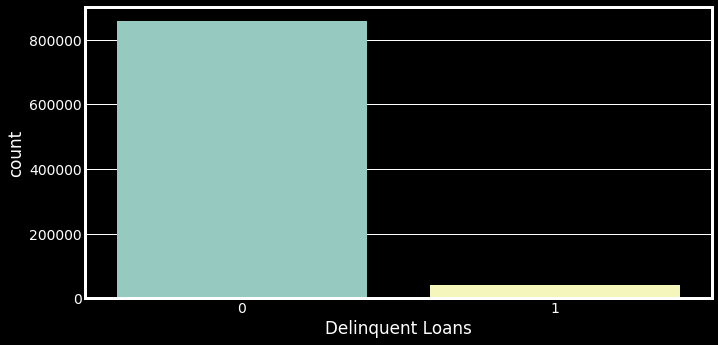

In [40]:
# View amount of loans that were delinquent.
print('How many loans resulted in delinquent status?\n',
      df['dlq'].value_counts())
print('\nWhat % of loans were delinquent?\n',
      df['dlq'].value_counts(normalize=True))

# Set Aesthetics.
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))

# Countplot.
g = sns.countplot(x='dlq', data=df)
g.set_xlabel('Delinquent Loans')
plt.show()

As previously seen, the amount of loans that ended up not being paid on time represents about 4.5% of the dataset & we can conclude the dataset is highly imbalanced.

In [41]:
# Creating a dataframe of delinquent loans to view by year. 
dlq1 = df.loc[df['dlq'] == 1]

In [42]:
# Creating another dataframe of non-delinquent loans to view by year.
dlq0 = df.loc[df['dlq'] == 0]

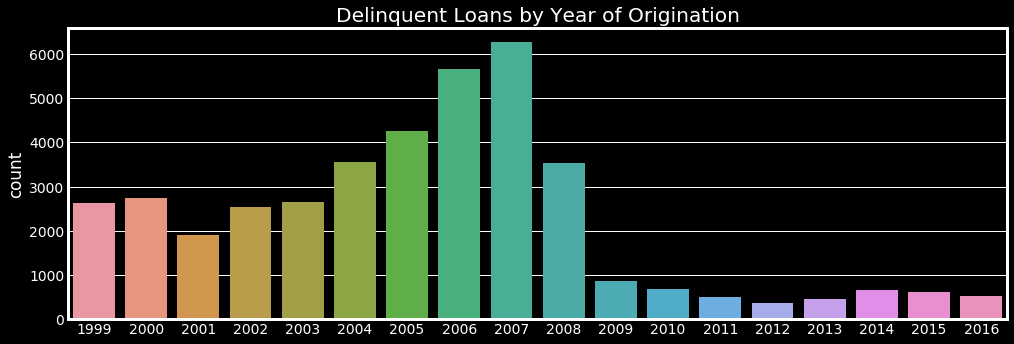

In [43]:
# Set Aesthetics.
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))

# View over time.
g = sns.countplot(x='year', data=dlq1)
g.set_xlabel('')
g.set_title('Delinquent Loans by Year of Origination')
plt.show()

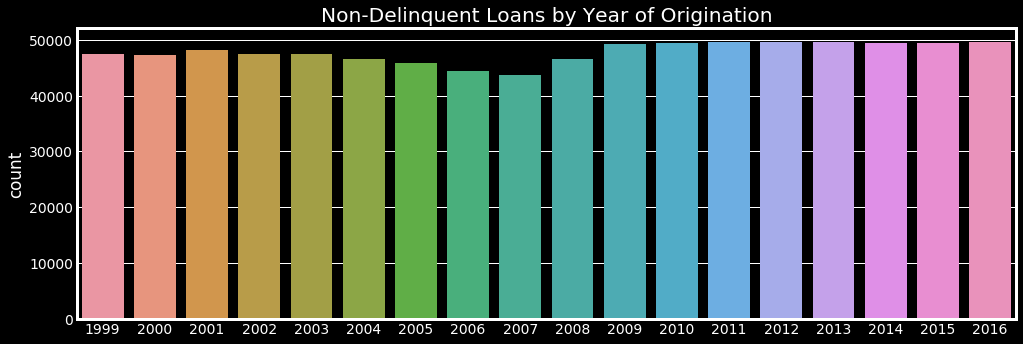

In [44]:
# Set aesthetics.
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))

# View over time.
g = sns.countplot(x='year', data=dlq0)
g.set_xlabel('')
g.set_title('Non-Delinquent Loans by Year of Origination')
plt.show()

## Numeric Variables

In [45]:
# Creating variables for plotting.
mean_credit_score = df['credit_score'].mean()
mean_int_rate = df['int_rate'].mean()
mean_ltv_ratio = df['ltv_ratio'].mean()
mean_dti_ratio = df['dti_ratio'].mean()
mean_cltv_ratio = df['cltv_ratio'].mean()
mean_upb = df['unpaid_princ_bal'].mean()
mean_mi = df['mortgage_insurance_pctg'].mean()

std_credit_score = df['credit_score'].std()
std_int_rate = df['int_rate'].std()
std_ltv_ratio = df['ltv_ratio'].std()
std_dti_ratio = df['dti_ratio'].std()
std_cltv_ratio = df['cltv_ratio'].std()
std_upb = df['unpaid_princ_bal'].std()
std_mi = df['mortgage_insurance_pctg'].std()

Text(0,0.5,'')

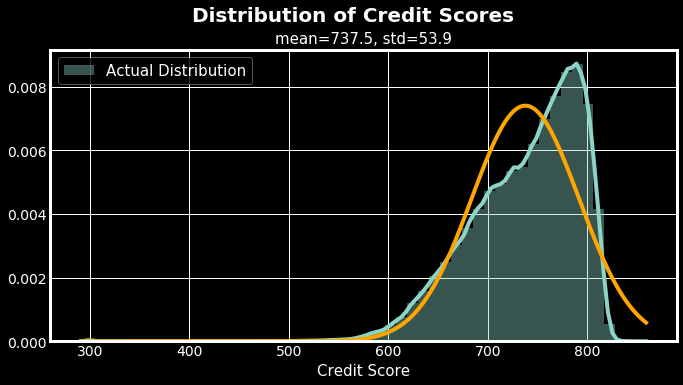

In [46]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Credit Scores', weight='bold', size=20, y=1)
ax.set_title('mean=%.1f, std=%.1f'%(mean_credit_score, std_credit_score), size=15)

# Distplot.
sns.distplot(df['credit_score'], fit_kws={'color':'orange'},
             kde=True, fit=norm, label='Actual Distribution')

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Credit Score', size=15)
ax.set_ylabel('')

Text(0,0.5,'FICO Score')

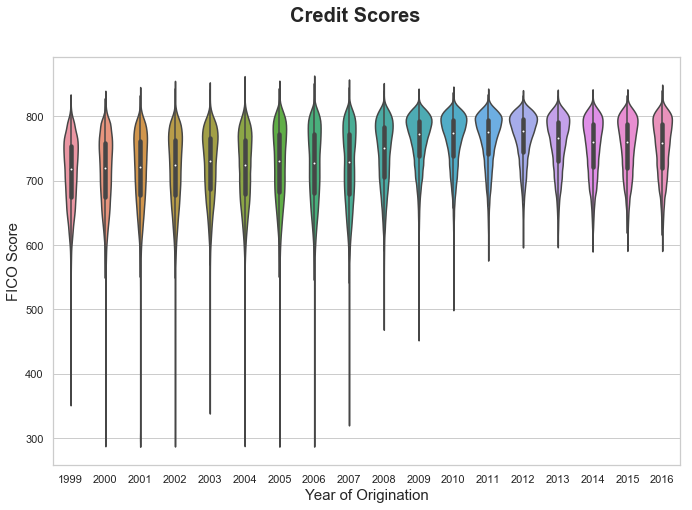

In [47]:
# Aesthetics.
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(10, 7))

# Title.
f.suptitle('Credit Scores', fontsize=20, weight='bold')

# Violinplot.
sns.violinplot(data=df, x='year', y='credit_score', ax=ax)

# Axis labels.
ax.set_xlabel('Year of Origination', size=15)
ax.set_ylabel('FICO Score', size=15)

[Violinplots](https://en.wikipedia.org/wiki/Violin_plot) are similar to boxplots except they also show the probability density of the data at different values. They will typically include a marker for the median of the data and a box indicating the interquartile range, as in standard box plots. The outer layer represents all possible results, with the thickness or width representing the mode average or how common the result. The next layer inside represents the values that occur 95% of the time (default seaborn setting). The next layer (if it exists) inside represents the values that occur 50% of the time. The central dot represents the median average value.

In the buildup to the financial crisis, loan applicants with lower credit scores were being approved. Thus we can see more variance within the lower FICO scores pre 2007. As stricter lending requirements were instilled post-crisis, we can also trace this with the increase in median average FICO scores. Looking at 2009, there is a higher probability of better credit scores, note the width of the 'hump' at the 800 level.

Text(0,0.5,'')

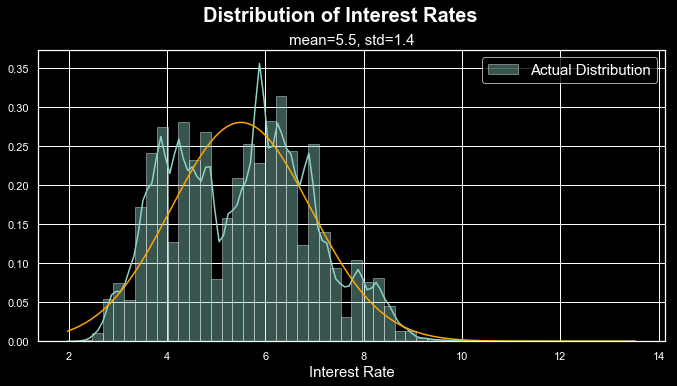

In [48]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Interest Rates', weight='bold', size=20, y=1)
ax.set_title('mean=%.1f, std=%.1f'%(mean_int_rate, std_int_rate), size=15)

# Distplot.
sns.distplot(df['int_rate'], fit_kws={'color':'orange'},
             kde=True, fit=norm, label='Actual Distribution')

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Interest Rate', size=15)
ax.set_ylabel('')

Text(0,0.5,'Interest Rate')

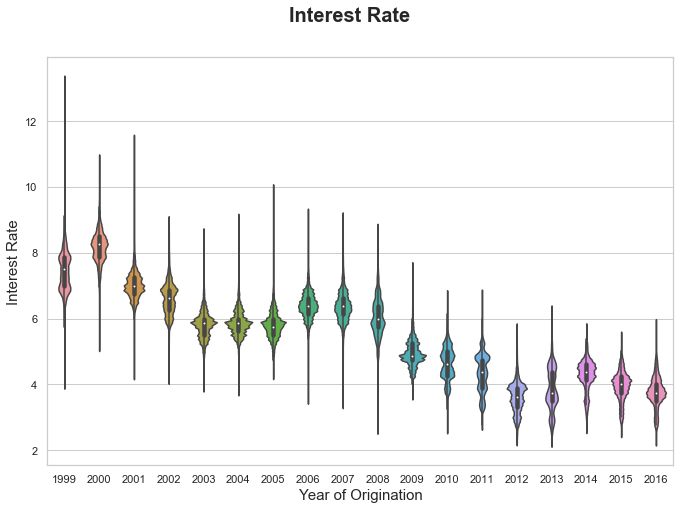

In [49]:
# Aesthetics.
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(10, 7))

# Title.
f.suptitle('Interest Rate', fontsize=20, weight='bold')

# Violinplot.
sns.violinplot(data=df, x='year', y='int_rate', ax=ax)

# Axis label.s
ax.set_xlabel('Year of Origination', size=15)
ax.set_ylabel('Interest Rate', size=15)

Broadly speaking & all else the same, a loan with a higher rate of interest will be more costly to the borrower over the life of the loan. Note the increase in interest rates from 2005-2006, just prior to the financial crisis, and then also please note the sub 4.5% rate level the Fed has sustained since.

Text(0,0.5,'')

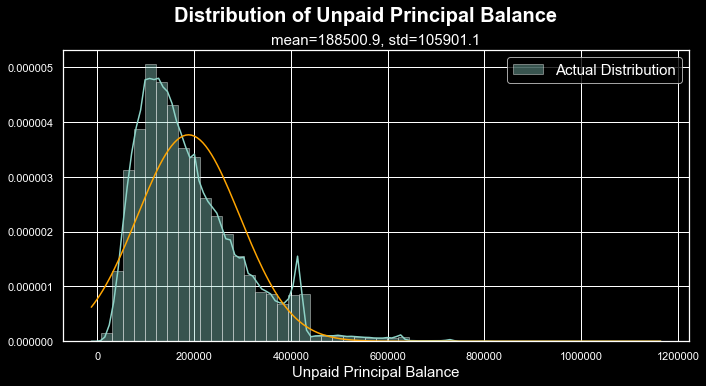

In [50]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Unpaid Principal Balance', weight='bold', size=20, y=1)
ax.set_title('mean=%.1f, std=%.1f'%(mean_upb, std_upb), size=15)

# Distplot.
sns.distplot(df['unpaid_princ_bal'], fit_kws={'color':'orange'},
             kde=True, fit=norm, label='Actual Distribution')

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Unpaid Principal Balance', size=15)
ax.set_ylabel('')

Unpaid Principal Balance (UPB) is the portion of a loan that has not yet been paid back. In the dataset, this represents the amount borrowed at origination, and therefore the amount the borrower owes the lender on the origination date of the loan.

Text(0,0.5,'UPB')

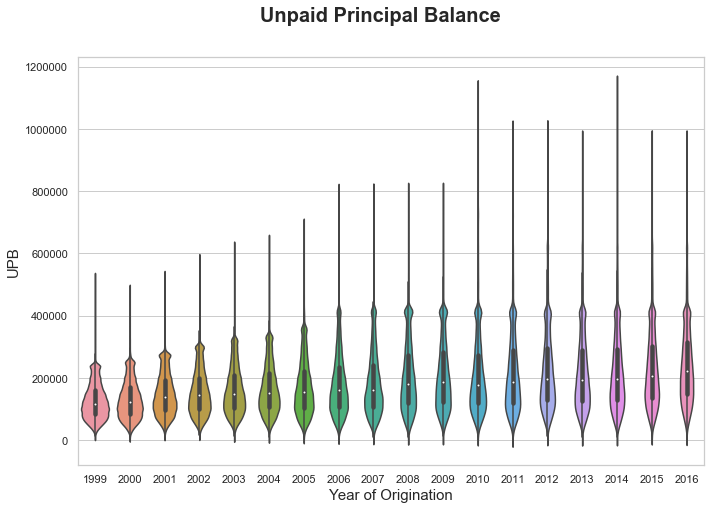

In [51]:
# Aesthetics.
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(10, 7))

# Title.
f.suptitle('Unpaid Principal Balance', fontsize=20, weight='bold')

# Violinplot.
sns.violinplot(data=df, x='year', y='unpaid_princ_bal', ax=ax)

# Axis label.s
ax.set_xlabel('Year of Origination', size=15)
ax.set_ylabel('UPB', size=15)

Interestingly, there appears to be an increasing trend in UPB, but relatively stable post-crisis. This could be due to external factors & further study should include domestic average housing prices & though unlikely to make a huge effect, adjust for inflation.

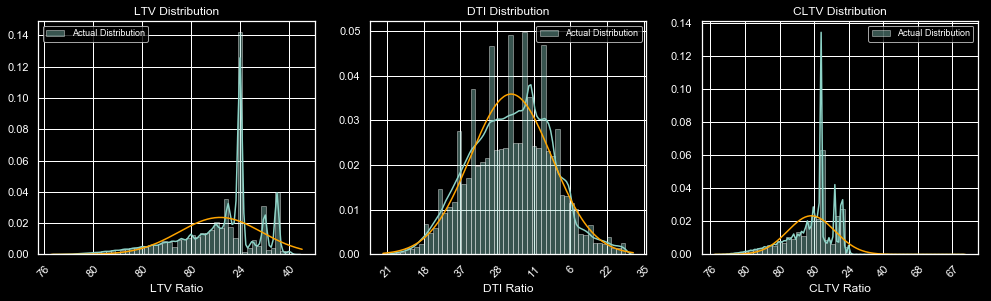

In [52]:
# Aesthetics.
plt.style.use('dark_background')
f, axes = plt.subplots(ncols=3, figsize=(15, 4))

# Loan-to-value ratio.
sns.distplot(df['ltv_ratio'], fit_kws={'color':'orange'}, kde=True,
             ax=axes[0], fit=norm,
             label='Actual Distribution').set_title('LTV Distribution')
axes[0].set_xlabel('LTV Ratio')
axes[0].set_xticklabels(df['ltv_ratio'], rotation=45)
axes[0].legend(loc='best', prop={'size':9})

# Debt-to-income ratio.
sns.distplot(df['dti_ratio'], fit_kws={'color':'orange'}, kde=True,
             ax=axes[1], fit=norm,
             label='Actual Distribution').set_title('DTI Distribution')
axes[1].set_xlabel('DTI Ratio')
axes[1].set_xticklabels(df['dti_ratio'], rotation=45)
axes[1].legend(loc='best', prop={'size':9})

# Combined loan-to-value ratio.
sns.distplot(df['cltv_ratio'], fit_kws={'color':'orange'}, kde=True,
             ax=axes[2], fit=norm,
             label='Actual Distribution').set_title('CLTV Distribution')
axes[2].set_xlabel('CLTV Ratio')
axes[2].set_xticklabels(df['cltv_ratio'], rotation=45)
axes[2].legend(loc='best', prop={'size':9})

Text(0,0.5,'LTV')

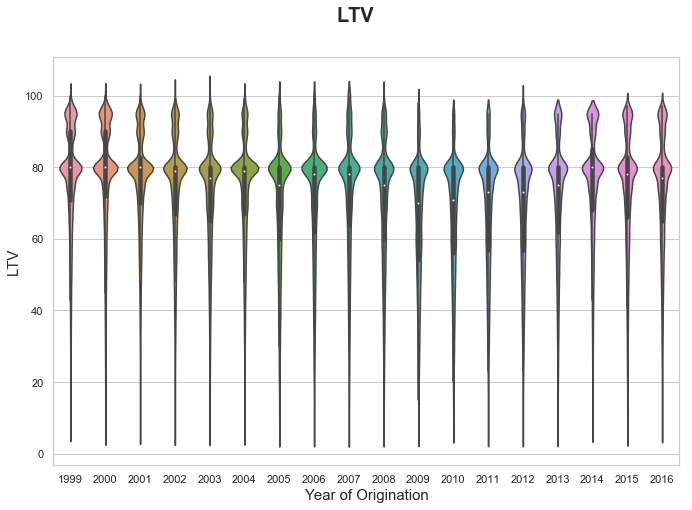

In [53]:
# Aesthetics.
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(10, 7))

# Title.
f.suptitle('LTV', fontsize=20, weight='bold')

# Violinplot.
sns.violinplot(data=df, x='year', y='ltv_ratio', ax=ax)

# Axis label.s
ax.set_xlabel('Year of Origination', size=15)
ax.set_ylabel('LTV', size=15)

Text(0,0.5,'CLTV')

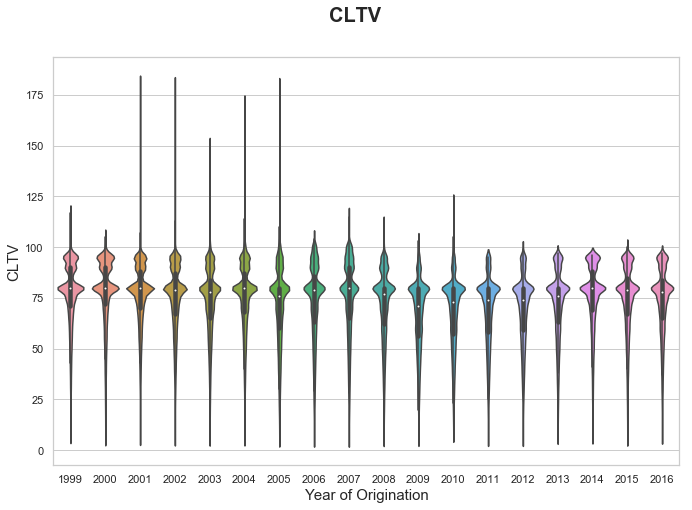

In [54]:
# Aesthetics.
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(10, 7))

# Title.
f.suptitle('CLTV', fontsize=20, weight='bold')

# Violinplot.
sns.violinplot(data=df, x='year', y='cltv_ratio', ax=ax)

# Axis label.s
ax.set_xlabel('Year of Origination', size=15)
ax.set_ylabel('CLTV', size=15)

Text(0,0.5,'DTI')

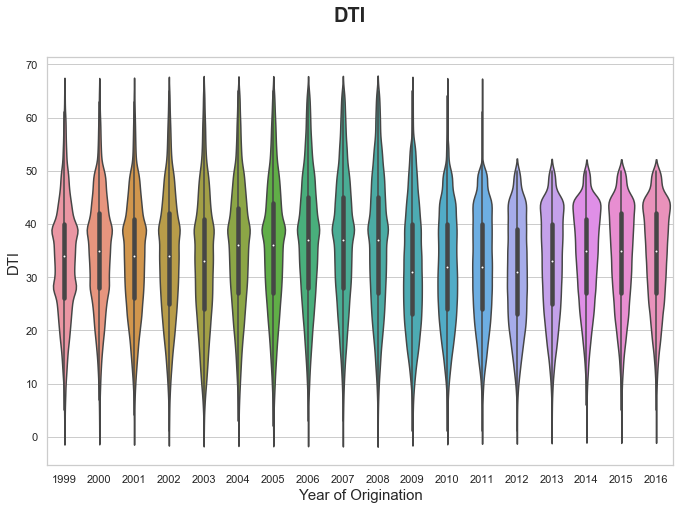

In [55]:
# Aesthetics.
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(10, 7))

# Title.
f.suptitle('DTI', fontsize=20, weight='bold')

# Violinplot.
sns.violinplot(data=df, x='year', y='dti_ratio', ax=ax)

# Axis label.s
ax.set_xlabel('Year of Origination', size=15)
ax.set_ylabel('DTI', size=15)

Text(0,0.5,'Count')

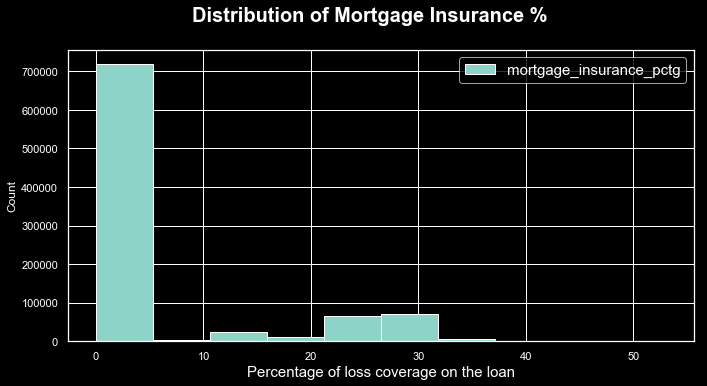

In [56]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Mortgage Insurance %', weight='bold', size=20, y=1)

# Histogram.
ax.hist(df['mortgage_insurance_pctg'])

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Percentage of loss coverage on the loan', size=15)
ax.set_ylabel('Count')

Mortgage Insurance Percentage (MI%) only ranges from 1%-55%. This represents the percentage of loss coverage on the loan, at the time of Freddie Mac's purchase of the mortgage loan that a mortgage insurer is providing to cover losses incurred as a result of a default on the loan.

### Skewed Distributions Check
Log transformation distplots for numeric variables below: <br>
1. Credit Score
2. Interest Rate
3. LTV Ratio
4. DTI Ratio
5. CLTV Ratio
6. Unpaid Principal Balance

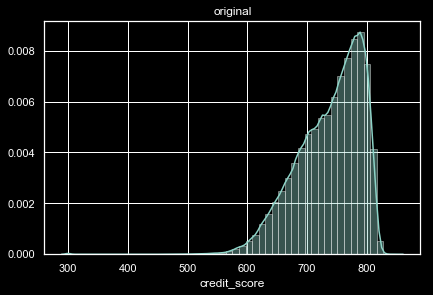

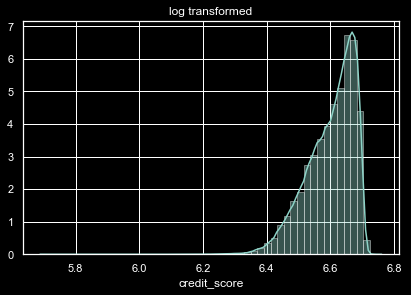

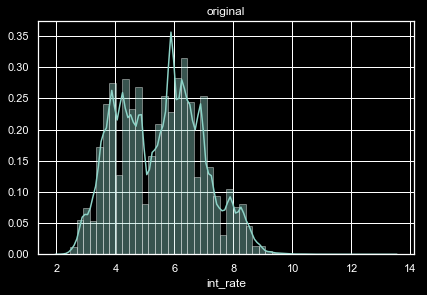

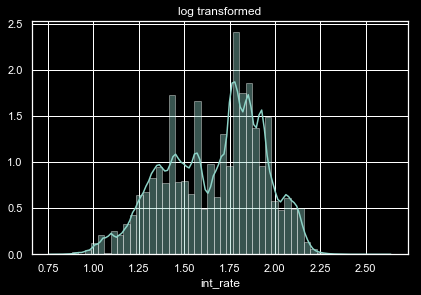

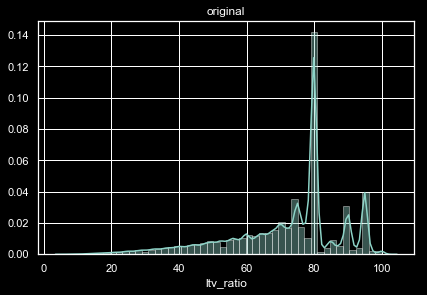

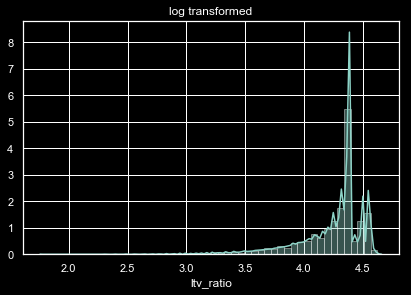

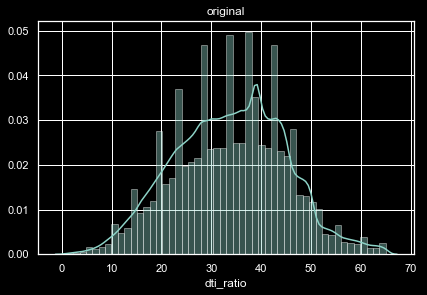

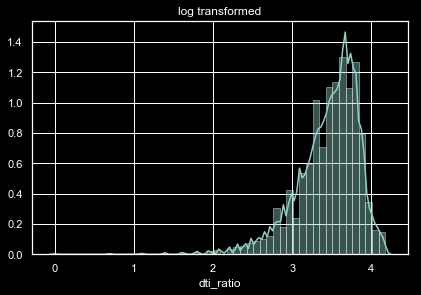

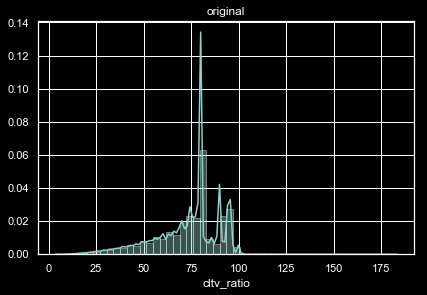

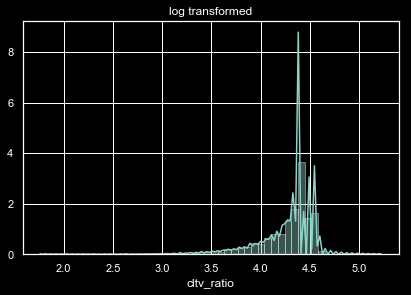

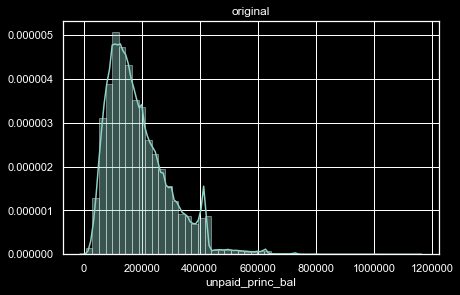

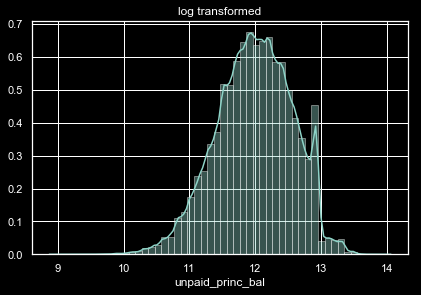

In [57]:
sns.distplot(df['credit_score'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['credit_score']))
plt.title('log transformed')
plt.show()

sns.distplot(df['int_rate'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['int_rate']))
plt.title('log transformed')
plt.show()

sns.distplot(df['ltv_ratio'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['ltv_ratio']))
plt.title('log transformed')
plt.show()

sns.distplot(df['dti_ratio'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['dti_ratio']))
plt.title('log transformed')
plt.show()

sns.distplot(df['cltv_ratio'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['cltv_ratio']))
plt.title('log transformed')
plt.show()

sns.distplot(df['unpaid_princ_bal'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['unpaid_princ_bal']))
plt.title('log transformed')
plt.show()

Will normalize DTI & UPB later.

## Categorical Variables

Text(81.7,0.5,'Purpose of Loan: Purchase, Cash-out, No Cash-out')

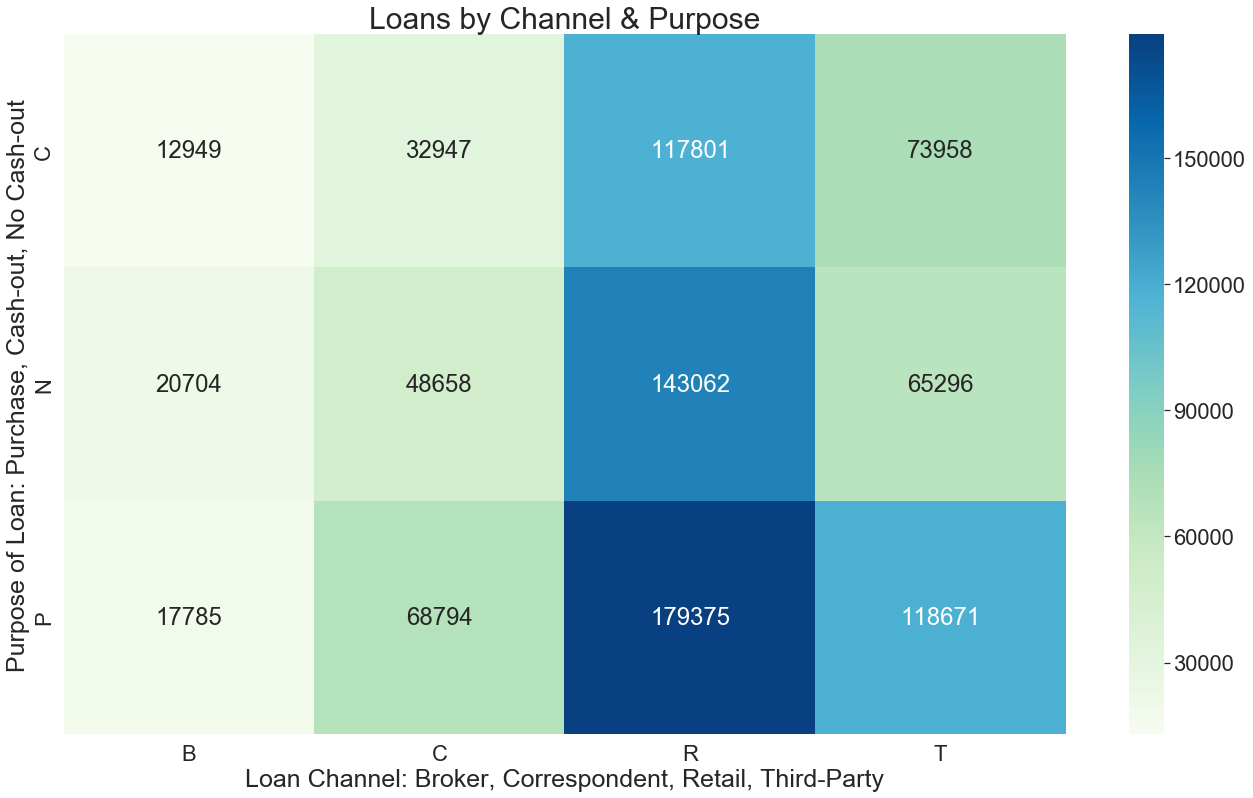

In [58]:
# Loan Purpose & Channel.

# Create a new dataframe for heatmap.
chnl_purp = pd.DataFrame()
chnl_purp = df.groupby(['channel', 'loan_purpose']).size().sort_values()
df_chnl_purp = chnl_purp.unstack()

# Aesthetics.
sns.set_style('white')
plt.figure(figsize=(20, 12))
sns.set(font_scale=2)

# Heatmap.
g = sns.heatmap(df_chnl_purp.T, mask = df_chnl_purp.T.isnull(),
                annot=True, fmt='d', cmap='GnBu')

# Title & axis labels.
plt.title('Loans by Channel & Purpose', size=30)
plt.xlabel('Loan Channel: Broker, Correspondent, Retail, Third-Party', size=25)
plt.ylabel('Purpose of Loan: Purchase, Cash-out, No Cash-out', size=25)

Channel indicates whether a Broker or Correspondent originated or was involved in the origination of the mortgage loan. If Third Party Origination is applicable, but the Seller does not specify Broker or Correspondent, the disclosure will indicated "TPO Not Specified". If neither TPO nor Retail designations are available, the disclosure will indicated "TPO Not Specified". If a Broker, Correspondent or Third Party Origination disclosure is not applicable, the mortgage loan will be designated as Retail.

Loan Purpose indicates whether the mortgage loan is a Cash-out Refinance mortgage, No Cash-out Refinance mortgage, or a Purchase mortgage. Cash-out Refinance is a loan in which the use of the loan amount is not limited to specific purposes. A No Cash-out loan is when the loan amount is limited to the following uses: <br>
1. Pay off the first mortgage, regardless of its age.
2. Pay off any junior liens secured by the mortgaged property, that were used in their entirety to acquire the subject property.
3. Pay related closing costs, financing costs and prepaid items, and disburse cash out to the Borrower not to exceed 2% of the new finance mortgage loan or USD2000, whichever is less.

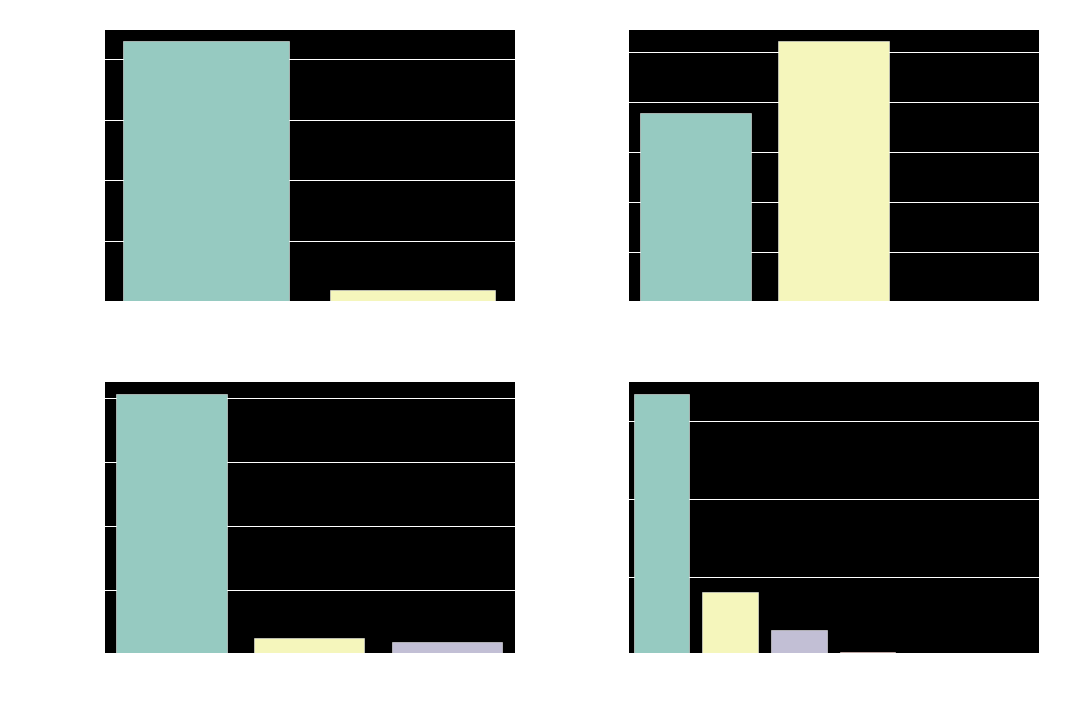

In [59]:
# Aesthetics.
fig = plt.figure(figsize=(15, 10))
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

# Delinquent Loan.
ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.countplot(df['dlq']).set_title('delinquent loans')
ax1.set_xlabel('where 1 == delinquent loan')

# Number of Borrowers per loan.
ax1 = plt.subplot2grid((2, 2), (0, 1))
sns.countplot(df['no_of_borrowers']).set_title('# of borrowers')
ax1.set_xlabel("where '2' indicates > 1 borrower per loan")

# Occupancy Status.
ax1 = plt.subplot2grid((2, 2), (1, 0))
sns.countplot(df['occupancy_status']).set_title('occupancy status')
ax1.set_xlabel('primary, secondary, or investment property')

# Property Type.
ax1 = plt.subplot2grid((2, 2), (1, 1))
sns.countplot(df['prop_type']).set_title('property type')
ax1.set_xlabel('single-family, planned unit, condo, manufactured home, co-op')

# Aesthetics (additional).
plt.tight_layout()

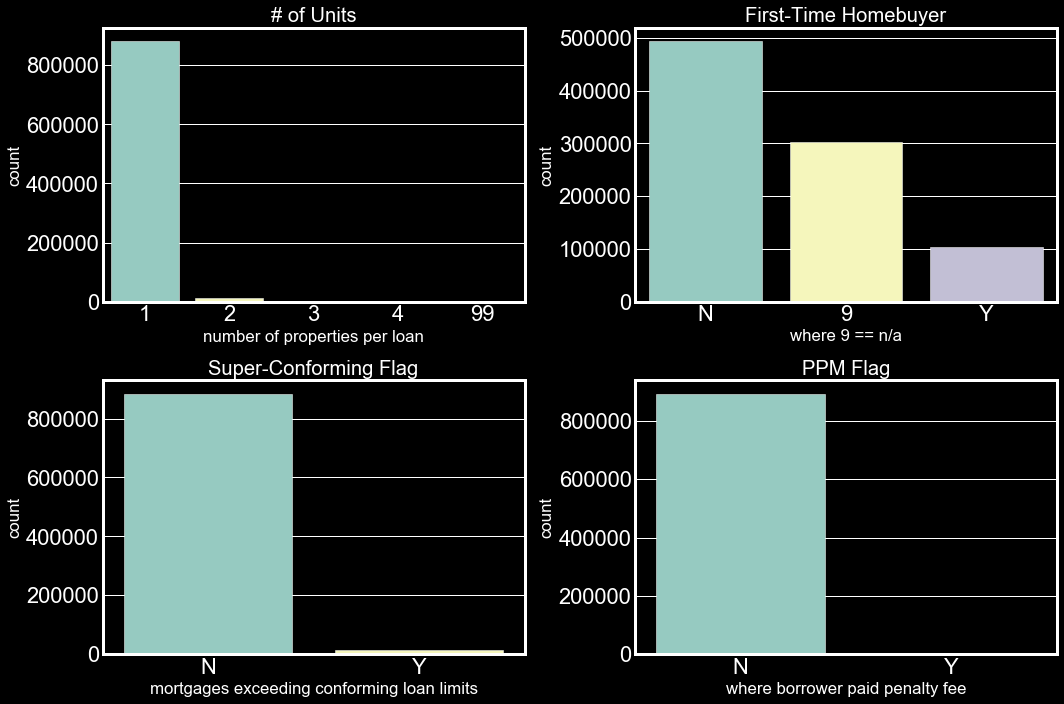

In [60]:
# Aesthetics.
fig = plt.figure(figsize=(15, 10))
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

# Number of Properties per loan.
ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.countplot(df['no_of_units']).set_title('# of Units')
ax1.set_xlabel('number of properties per loan')

# First Home Flag.
ax1 = plt.subplot2grid((2, 2), (0, 1))
sns.countplot(df['first_home_flag']).set_title('First-Time Homebuyer')
ax1.set_xlabel('where 9 == n/a')

# Super-Conforming Flag.
ax1 = plt.subplot2grid((2, 2), (1, 0))
sns.countplot(df['super_conform_flag']).set_title('Super-Conforming Flag')
ax1.set_xlabel('mortgages exceeding conforming loan limits')

# PPM Flag.
ax1 = plt.subplot2grid((2, 2), (1, 1))
sns.countplot(df['ppm_flag']).set_title('PPM Flag')
ax1.set_xlabel('where borrower paid penalty fee')

# Aesthetics (additional).
plt.tight_layout()

Interesting to note more properties with loans are used for investment purposes than secondary home.

Top 10 Sellers of Mortgages to Freddie Mac
 Other sellers           215246
WELLSFARGOBANK,NA       126177
WELLSFARGOHOMEMORTGA     60765
USBANKNA                 51547
BANKOFAMERICA,NA         49380
ABNAMROMTGEGROUP,INC     44904
BRANCHBANKING&TRUSTC     29629
CHASEHOMEFINANCELLC      26451
COUNTRYWIDE              24606
NATLCITYMTGECO           19000
Name: seller, dtype: int64


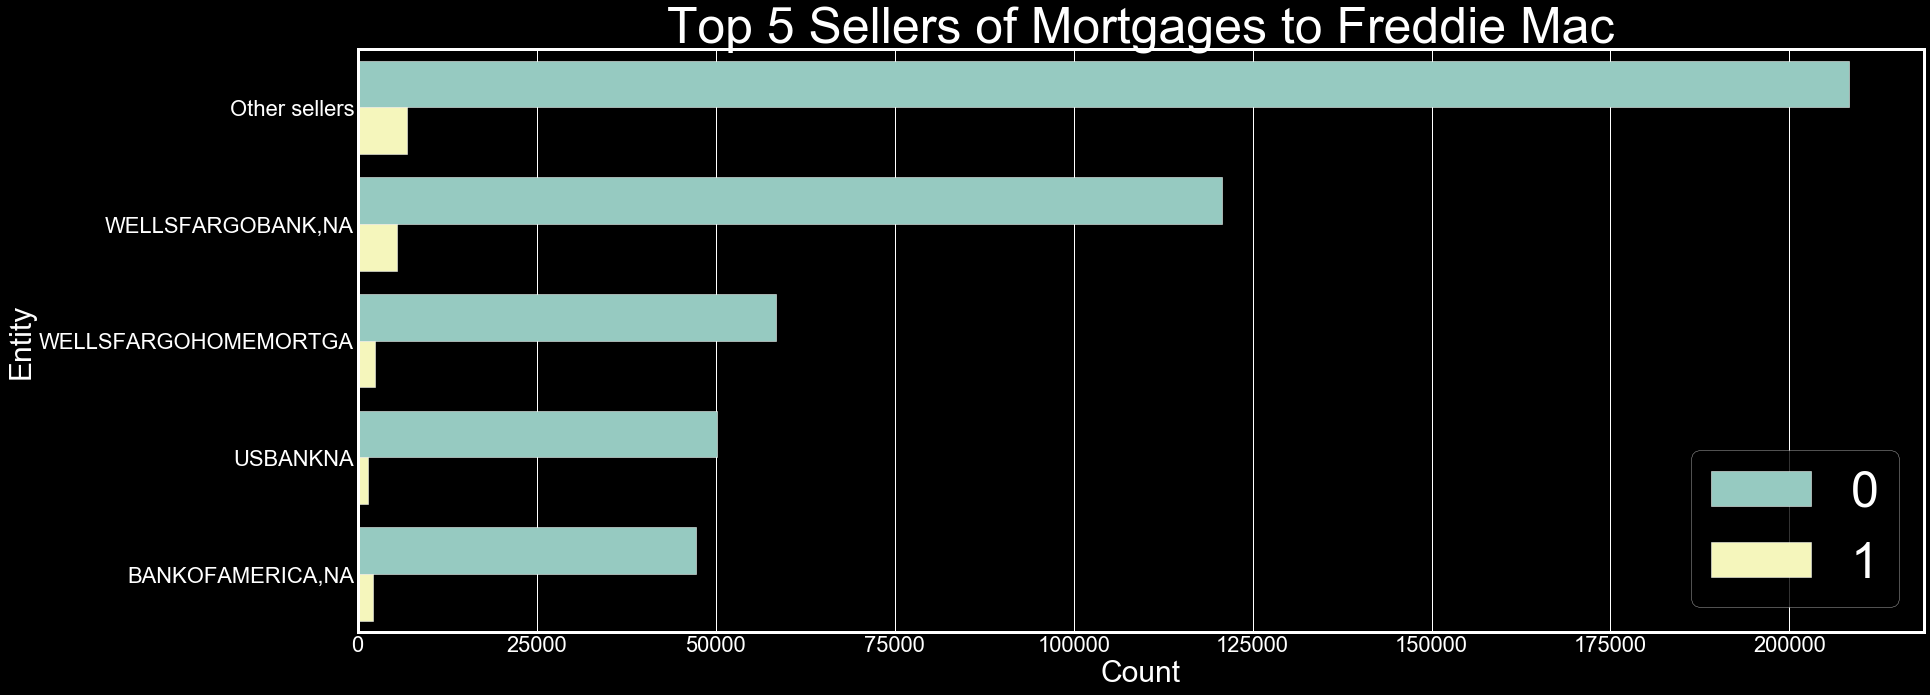

Top 10 Servicers of Mortgages to Freddie Mac
 Other servicers         208772
WELLSFARGOBANK,NA       167101
JPMORGANCHASEBANK,NA     64063
BANKOFAMERICA,NA         61786
USBANKNA                 57337
WELLSFARGOHOMEMORTGA     42106
CITIMORTGAGE,INC         34443
BRANCHBANKING&TRUSTC     29864
ABNAMROMTGEGROUP,INC     24566
PROVIDENTFUNDINGASSO     15387
Name: servicer, dtype: int64


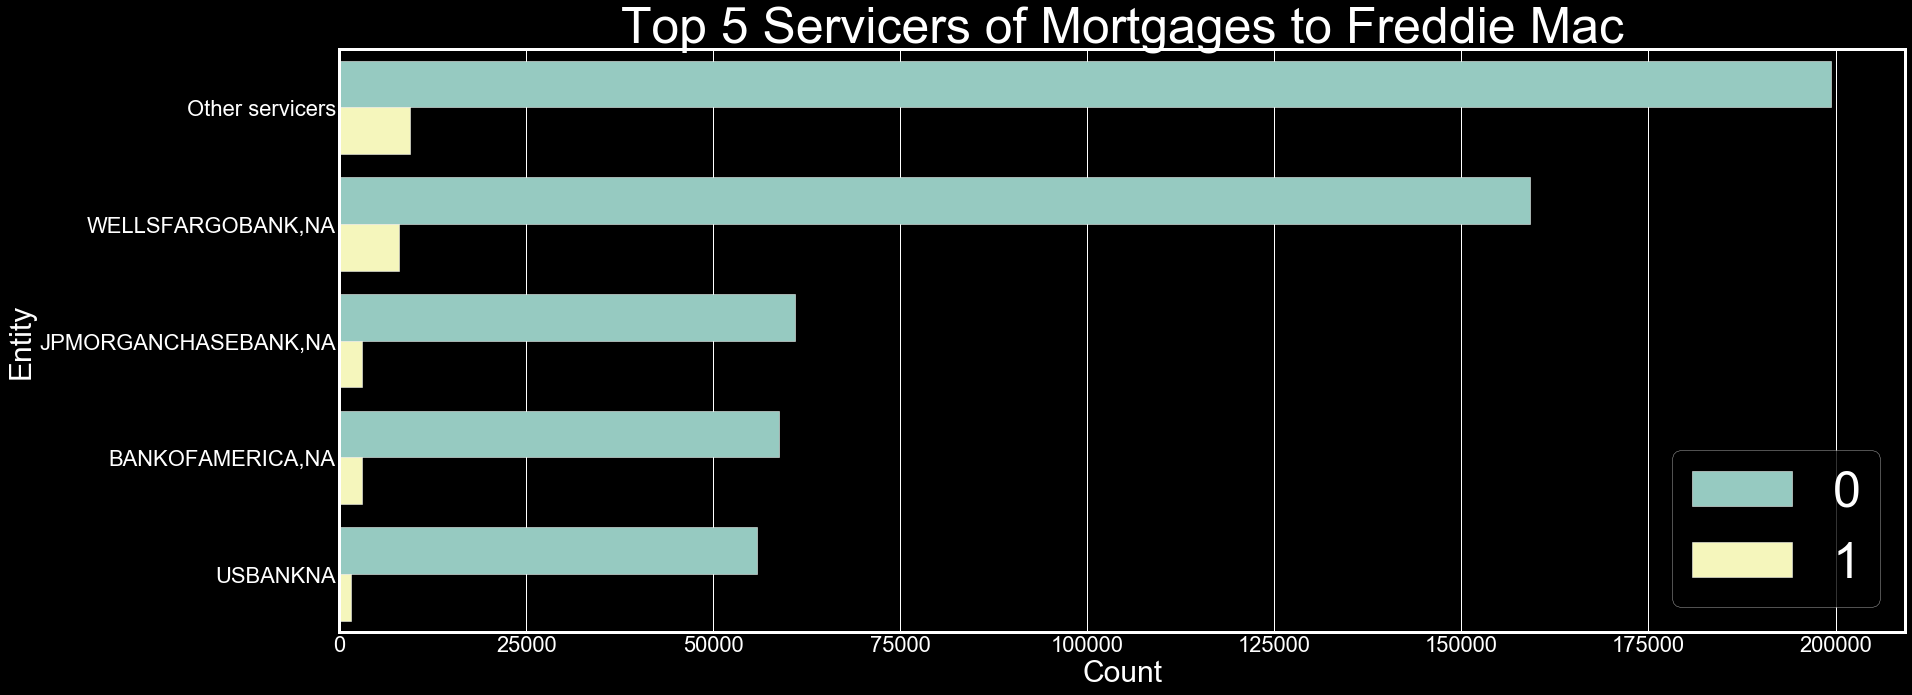

In [61]:
# Sizing & style.
plt.figure(figsize=(25, 10))
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

# Sellers.
# Countplot.
g1 = sns.countplot(y='seller', hue='dlq', data=df,
              order=df.seller.value_counts().iloc[:5].index)

# Aesthetics.
plt.title('Top 5 Sellers of Mortgages to Freddie Mac', size=50)
plt.xlabel('Count', size=30)
plt.ylabel('Entity', size=30)
plt.legend(fontsize=50)
print('Top 10 Sellers of Mortgages to Freddie Mac\n',
       df['seller'].value_counts().head(10))
plt.show()

# Servicers.

# Sizing.
plt.figure(figsize=(25, 10))

# Countplot.
g2 = sns.countplot(y='servicer', hue='dlq', data=df,
              order=df.servicer.value_counts().iloc[:5].index)

# Aesthetics.
plt.title('Top 5 Servicers of Mortgages to Freddie Mac', size=50)
plt.xlabel('Count', size=30)
plt.ylabel('Entity', size=30)
plt.legend(fontsize=50)
print('Top 10 Servicers of Mortgages to Freddie Mac\n',
       df['servicer'].value_counts().head(10))
plt.show()

No surprise the largest US banks were heavily involved in the mortgage business.

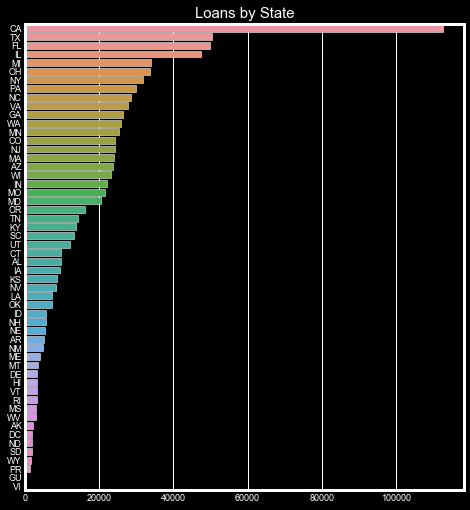

In [62]:
# Geographic distribution.

# Sizing & style.
plt.figure(figsize=(7, 8))
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

# Countplot.
sns.countplot(y='state', data=df,
              order=df.state.value_counts().iloc[:55].index)

# Aesthetics.
plt.title('Loans by State', size=15)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

Again no surpise, the most loans by state happen to be the largest states in the US by population.

# Model Prep

* Feature Engineering: log, sqrt, drop
* Scaling
* Under-Sampling
* Dummies
* Corre
* Assign X & Y
* PCA
* Split to Train and Test Sets

## Normalize DTI & UPB

In [63]:
# Apply log transformation for DTI & UPB.
log_df = df.copy()
log_df['dti_ratio'] = np.log(log_df['dti_ratio'])
log_df['unpaid_princ_bal'] = np.log(log_df['unpaid_princ_bal'])
print(df.dti_ratio.describe())
print(df.unpaid_princ_bal.describe())
print(log_df.dti_ratio.describe())
print(log_df.unpaid_princ_bal.describe())
log_df.columns

count    900000.000000
mean         33.805268
std          11.122659
min           1.000000
25%          26.000000
50%          34.000000
75%          42.000000
max          65.000000
Name: dti_ratio, dtype: float64
count    9.000000e+05
mean     1.885009e+05
std      1.059011e+05
min      8.000000e+03
25%      1.100000e+05
50%      1.640000e+05
75%      2.450000e+05
max      1.144000e+06
Name: unpaid_princ_bal, dtype: float64
count    900000.000000
mean          3.454689
std           0.391262
min           0.000000
25%           3.258097
50%           3.526361
75%           3.737670
max           4.174387
Name: dti_ratio, dtype: float64
count    900000.000000
mean         11.991381
std           0.572463
min           8.987197
25%          11.608236
50%          12.007622
75%          12.409013
max          13.950041
Name: unpaid_princ_bal, dtype: float64


Index(['lsn', 'dlq', 'credit_score', 'int_rate', 'ltv_ratio', 'dti_ratio',
       'cltv_ratio', 'unpaid_princ_bal', 'mortgage_insurance_pctg',
       'loan_purpose', 'no_of_units', 'occupancy_status', 'no_of_borrowers',
       'first_home_flag', 'super_conform_flag', 'ppm_flag', 'state',
       'prop_type', 'channel', 'seller', 'servicer', 'loan_term',
       'maturity_date', 'first_pmt_date', 'year', 'miss_credit_score',
       'miss_ltv_ratio', 'miss_dti_ratio', 'miss_cltv_ratio', 'miss_mi_pct'],
      dtype='object')

## Scaling Numerical Variables

In [64]:
# Copy dataframe.
scaled_df = log_df.copy()

# Ignore warning.
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Scaling numerical features.
scaled_df = df.copy()
scaler = StandardScaler()
scaled_df['credit_score_sc'] = scaler.fit_transform(scaled_df['credit_score'].values.reshape(-1, 1))
scaled_df['int_rate_sc'] = scaler.fit_transform(scaled_df['int_rate'].values.reshape(-1, 1))
scaled_df['ltv_sc'] = scaler.fit_transform(scaled_df['ltv_ratio'].values.reshape(-1, 1))
scaled_df['dti_sc'] = scaler.fit_transform(scaled_df['dti_ratio'].values.reshape(-1, 1))
scaled_df['cltv_sc'] = scaler.fit_transform(scaled_df['cltv_ratio'].values.reshape(-1, 1))
scaled_df['upb_sc'] = scaler.fit_transform(scaled_df['unpaid_princ_bal'].values.reshape(-1, 1))
scaled_df['mi_sc'] = scaler.fit_transform(scaled_df['mortgage_insurance_pctg'].values.reshape(-1, 1))

# Removing unscaled numerical features.
scaled_df.drop(['credit_score', 'int_rate', 'ltv_ratio', 'dti_ratio', 'cltv_ratio',
                'unpaid_princ_bal', 'mortgage_insurance_pctg'], axis=1, inplace=True)

# Removing irrelevant cols.
scaled_df = scaled_df.drop(['lsn', 'loan_term', 'maturity_date',
                            'first_pmt_date', 'year', 'state'], axis=1)

# View.
scaled_df.head()

,dlq,loan_purpose,no_of_units,occupancy_status,no_of_borrowers,first_home_flag,super_conform_flag,ppm_flag,prop_type,channel,...,miss_dti_ratio,miss_cltv_ratio,miss_mi_pct,credit_score_sc,int_rate_sc,ltv_sc,dti_sc,cltv_sc,upb_sc,mi_sc
0,0,N,1,P,1,N,N,N,SF,R,...,0,0,0,1.141173,0.965371,-0.109877,-0.791652,-0.172039,-1.364490,-0.479279
1,0,P,1,P,2,N,N,N,SF,R,...,0,0,0,-1.902568,0.349784,0.246176,-1.151278,0.179310,-0.675167,-0.479279
2,0,P,1,P,2,N,N,N,PU,R,...,0,0,1,0.918461,0.877430,0.483544,-1.420998,0.413542,-0.609068,-0.479279
3,0,P,1,P,2,N,N,N,SF,T,...,0,0,0,-0.213663,0.965371,0.483544,0.287228,0.413542,-0.760152,-0.479279
4,0,N,1,P,2,9,N,N,SF,R,...,0,0,1,0.194644,1.141253,0.483544,-0.521932,0.413542,-0.694053,-0.479279


## Class Imbalance
The target variable 'dlq' is heavily skewed, so we must create sub-samples or risk overfitting the models.

In [65]:
# Review the imbalance.
print('What % of loans end up in default?\n',
      scaled_df['dlq'].value_counts(normalize=True))
print('\nNumerical count:\n', scaled_df['dlq'].value_counts())

What % of loans end up in default?
 0    0.955078
1    0.044922
Name: dlq, dtype: float64

Numerical count:
 0    859570
1     40430
Name: dlq, dtype: int64


In [66]:
# Assign variable for 'dlq' == 1.
dlq_count = len(scaled_df.loc[scaled_df['dlq'] == 1])

# Creating dataframes for merge, where dlq == 0 & dlq == 1.
sample_df = scaled_df.sample(frac=1)
df_0 = sample_df.loc[sample_df['dlq'] == 0][:dlq_count]
df_1 = sample_df.loc[sample_df['dlq'] == 1]

# Combine instances of default & non-default.
sample_model_df = pd.concat([df_0, df_1])

# Return random sample.
sample_model_df = sample_model_df.sample(frac=1, random_state=42)
print(sample_model_df.shape)
sample_model_df.head()

(80860, 24)


,dlq,loan_purpose,no_of_units,occupancy_status,no_of_borrowers,first_home_flag,super_conform_flag,ppm_flag,prop_type,channel,...,miss_dti_ratio,miss_cltv_ratio,miss_mi_pct,credit_score_sc,int_rate_sc,ltv_sc,dti_sc,cltv_sc,upb_sc,mi_sc
34088,0,N,1,P,1,9,N,N,SF,R,...,0,0,0,0.974139,-1.496976,-0.050535,-0.432025,-0.113481,-0.930122,-0.479279
25613,1,N,1,P,1,N,N,N,SF,R,...,0,0,0,-4.445205,-0.089921,1.314334,1.186294,1.233354,0.627937,2.407046
44225,1,P,1,P,1,N,N,N,PU,T,...,0,0,0,0.380238,0.701548,1.670387,0.826667,1.584702,0.136912,2.888100
6737,0,C,1,I,2,9,N,N,SF,R,...,0,0,0,-0.325019,-0.881389,0.127492,0.556947,0.062194,-1.118978,-0.479279
47867,1,C,1,P,1,N,N,N,SF,T,...,0,0,0,-2.106721,0.877430,-1.237377,-1.600811,-1.284641,-1.071764,-0.479279


In [67]:
print('Where 0 == non-delinquent')
print('and 1 == delinquent:\n')
print('The number of indexes within the model_df is:')
print(sample_model_df['dlq'].value_counts())

Where 0 == non-delinquent
and 1 == delinquent:

The number of indexes within the model_df is:
1    40430
0    40430
Name: dlq, dtype: int64


## Categorical Variables: Generating Dummy Variables 

We need to make sure our models run in a timely manner. Too many values within the model dataframe will cause slow performance (on my laptop at least) when running the classification models. Prior to creating dummies for our categorical variables, let's try manipulating 2 categorical features with numerous values: Seller & Servicer.

In [68]:
# View the amount of unique values for seller & servicer.
seller_num_uniq = len(sample_model_df.seller.value_counts())
servicer_num_uniq = len(sample_model_df.servicer.value_counts())
sell_serv_tot_uniq = seller_num_uniq + servicer_num_uniq
print(sell_serv_tot_uniq)

177


Creating dummies for these will effectively add another 177 columns to our model dataframe. To keep my laptop working, let's remove the seller and servicers from the dataframe.

In [69]:
sample_model_df = sample_model_df.drop(['seller', 'servicer'], axis=1)
sample_model_df.columns

Index(['dlq', 'loan_purpose', 'no_of_units', 'occupancy_status',
       'no_of_borrowers', 'first_home_flag', 'super_conform_flag', 'ppm_flag',
       'prop_type', 'channel', 'miss_credit_score', 'miss_ltv_ratio',
       'miss_dti_ratio', 'miss_cltv_ratio', 'miss_mi_pct', 'credit_score_sc',
       'int_rate_sc', 'ltv_sc', 'dti_sc', 'cltv_sc', 'upb_sc', 'mi_sc'],
      dtype='object')

Let's double check our categorical variables to see if we've missed anything.

In [70]:
# Quick test, identify categorical vars with no created dummy cols.
test_model_dummies = pd.get_dummies(sample_model_df)
test_model_dummies.columns

Index(['dlq', 'no_of_units', 'no_of_borrowers', 'miss_credit_score',
       'miss_ltv_ratio', 'miss_dti_ratio', 'miss_cltv_ratio', 'miss_mi_pct',
       'credit_score_sc', 'int_rate_sc', 'ltv_sc', 'dti_sc', 'cltv_sc',
       'upb_sc', 'mi_sc', 'loan_purpose_C', 'loan_purpose_N', 'loan_purpose_P',
       'occupancy_status_I', 'occupancy_status_P', 'occupancy_status_S',
       'first_home_flag_9', 'first_home_flag_N', 'first_home_flag_Y',
       'super_conform_flag_N', 'super_conform_flag_Y', 'ppm_flag_N',
       'ppm_flag_Y', 'prop_type_99', 'prop_type_CO', 'prop_type_CP',
       'prop_type_MH', 'prop_type_PU', 'prop_type_SF', 'channel_B',
       'channel_C', 'channel_R', 'channel_T'],
      dtype='object')

Will use one-hot encoding for no_of_units & no_of_borrowers.

In [71]:
test_model_dummies.no_of_units.value_counts()

1     78955
2      1487
3       217
4       200
99        1
Name: no_of_units, dtype: int64

In [72]:
test_model_dummies.no_of_borrowers.value_counts()

2     40904
1     39944
99       12
Name: no_of_borrowers, dtype: int64

In [73]:
# Run the built-in pandas dummy creation.
model_dummies = pd.get_dummies(sample_model_df)
print(model_dummies.shape)
model_dummies.columns

(80860, 38)


Index(['dlq', 'no_of_units', 'no_of_borrowers', 'miss_credit_score',
       'miss_ltv_ratio', 'miss_dti_ratio', 'miss_cltv_ratio', 'miss_mi_pct',
       'credit_score_sc', 'int_rate_sc', 'ltv_sc', 'dti_sc', 'cltv_sc',
       'upb_sc', 'mi_sc', 'loan_purpose_C', 'loan_purpose_N', 'loan_purpose_P',
       'occupancy_status_I', 'occupancy_status_P', 'occupancy_status_S',
       'first_home_flag_9', 'first_home_flag_N', 'first_home_flag_Y',
       'super_conform_flag_N', 'super_conform_flag_Y', 'ppm_flag_N',
       'ppm_flag_Y', 'prop_type_99', 'prop_type_CO', 'prop_type_CP',
       'prop_type_MH', 'prop_type_PU', 'prop_type_SF', 'channel_B',
       'channel_C', 'channel_R', 'channel_T'],
      dtype='object')

In [74]:
# Load the sklearn package.
from sklearn.preprocessing import OneHotEncoder

# Binary encoder essentially performs same function as pd.get_dummies.
ohe = OneHotEncoder(sparse=False)

# Assign vars for reshape.
hot_units = model_dummies['no_of_units'].values.reshape(-1, 1)
hot_borrow = model_dummies['no_of_borrowers'].values.reshape(-1, 1)

# Fit & transform.
ohe_units = ohe.fit_transform(hot_units)
ohe_borrow = ohe.fit_transform(hot_borrow)

# Append new cols to the dataframe.
model_dummies['units_1'] = ohe_units[:, 0]
model_dummies['units_2'] = ohe_units[:, 1]
model_dummies['units_3'] = ohe_units[:, 2]
model_dummies['units_4'] = ohe_units[:, 3]
model_dummies['borrow_1'] = ohe_borrow[:, 0]
model_dummies['borrow_2'] = ohe_borrow[:, 1]
model_dummies['borrow_99'] = ohe_borrow[:, 2]

# Now remove the original no_of_units, no_of_borrowers.
final_dummies = model_dummies.drop(['no_of_units', 'no_of_borrowers'], axis=1)

In [75]:
print(final_dummies.columns)
print(final_dummies.shape)

Index(['dlq', 'miss_credit_score', 'miss_ltv_ratio', 'miss_dti_ratio',
       'miss_cltv_ratio', 'miss_mi_pct', 'credit_score_sc', 'int_rate_sc',
       'ltv_sc', 'dti_sc', 'cltv_sc', 'upb_sc', 'mi_sc', 'loan_purpose_C',
       'loan_purpose_N', 'loan_purpose_P', 'occupancy_status_I',
       'occupancy_status_P', 'occupancy_status_S', 'first_home_flag_9',
       'first_home_flag_N', 'first_home_flag_Y', 'super_conform_flag_N',
       'super_conform_flag_Y', 'ppm_flag_N', 'ppm_flag_Y', 'prop_type_99',
       'prop_type_CO', 'prop_type_CP', 'prop_type_MH', 'prop_type_PU',
       'prop_type_SF', 'channel_B', 'channel_C', 'channel_R', 'channel_T',
       'units_1', 'units_2', 'units_3', 'units_4', 'borrow_1', 'borrow_2',
       'borrow_99'],
      dtype='object')
(80860, 43)


In [76]:
# View first index as example.
final_dummies.iloc[0, :]

dlq                     0.000000
miss_credit_score       0.000000
miss_ltv_ratio          0.000000
miss_dti_ratio          0.000000
miss_cltv_ratio         0.000000
miss_mi_pct             0.000000
credit_score_sc         0.974139
int_rate_sc            -1.496976
ltv_sc                 -0.050535
dti_sc                 -0.432025
cltv_sc                -0.113481
upb_sc                 -0.930122
mi_sc                  -0.479279
loan_purpose_C          0.000000
loan_purpose_N          1.000000
loan_purpose_P          0.000000
occupancy_status_I      0.000000
occupancy_status_P      1.000000
occupancy_status_S      0.000000
first_home_flag_9       1.000000
first_home_flag_N       0.000000
first_home_flag_Y       0.000000
super_conform_flag_N    1.000000
super_conform_flag_Y    0.000000
ppm_flag_N              1.000000
ppm_flag_Y              0.000000
prop_type_99            0.000000
prop_type_CO            0.000000
prop_type_CP            0.000000
prop_type_MH            0.000000
prop_type_

Let's reorganize the dataframe again, placing our target in the first column, followed by our scaled numerical variables, missingness variables in the subsequent block, then our cateogoricals, which have now been changed to binary form. This process isn't necessary, but is mainly for viewing on the heatmap.

In [77]:
# Assigning vars for the reorganization of the dataframe.
dlq_val = final_dummies['dlq']
miss_credit_score_val = final_dummies['miss_credit_score']
miss_ltv_ratio_val = final_dummies['miss_ltv_ratio']
miss_dti_ratio_val = final_dummies['miss_dti_ratio']
miss_cltv_ratio_val = final_dummies['miss_cltv_ratio']
miss_mi_pct_val = final_dummies['miss_mi_pct']
credit_score_sc_val = final_dummies['credit_score_sc']
int_rate_sc_val = final_dummies['int_rate_sc']
ltv_sc_val = final_dummies['ltv_sc']
dti_sc_val = final_dummies['dti_sc']
cltv_sc_val = final_dummies['cltv_sc']
upb_sc_val = final_dummies['upb_sc']
mi_sc_val = final_dummies['mi_sc']
loan_purpose_C_val = final_dummies['loan_purpose_C']
loan_purpose_N_val = final_dummies['loan_purpose_N']
loan_purpose_P_val = final_dummies['loan_purpose_P']
occupancy_status_I_val = final_dummies['occupancy_status_I']
occupancy_status_P_val = final_dummies['occupancy_status_P']
occupancy_status_S_val = final_dummies['occupancy_status_S']
first_home_flag_9_val = final_dummies['first_home_flag_9']
first_home_flag_N_val = final_dummies['first_home_flag_N']
first_home_flag_Y_val = final_dummies['first_home_flag_Y']
super_conform_flag_N_val = final_dummies['super_conform_flag_N']
super_conform_flag_Y_val = final_dummies['super_conform_flag_Y']
ppm_flag_N_val = final_dummies['ppm_flag_N']
ppm_flag_Y_val = final_dummies['ppm_flag_Y']
prop_type_99_val = final_dummies['prop_type_99']
prop_type_CO_val = final_dummies['prop_type_CO']
prop_type_CP_val = final_dummies['prop_type_CP']
prop_type_MH_val = final_dummies['prop_type_MH']
prop_type_PU_val = final_dummies['prop_type_PU']
prop_type_SF_val = final_dummies['prop_type_SF']
channel_B_val = final_dummies['channel_B']
channel_C_val = final_dummies['channel_C']
channel_R_val = final_dummies['channel_R']
channel_T_val = final_dummies['channel_T']
units_1_val = final_dummies['units_1']
units_2_val = final_dummies['units_2']
units_3_val = final_dummies['units_3']
units_4_val = final_dummies['units_4']
borrow_1_val = final_dummies['borrow_1']
borrow_2_val = final_dummies['borrow_2']
borrow_99_val = final_dummies['borrow_99']

In [78]:
reorg_df = final_dummies
reorg_df.head()

,dlq,miss_credit_score,miss_ltv_ratio,miss_dti_ratio,miss_cltv_ratio,miss_mi_pct,credit_score_sc,int_rate_sc,ltv_sc,dti_sc,...,channel_C,channel_R,channel_T,units_1,units_2,units_3,units_4,borrow_1,borrow_2,borrow_99
34088,0,0,0,0,0,0,0.974139,-1.496976,-0.050535,-0.432025,...,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
25613,1,0,0,0,0,0,-4.445205,-0.089921,1.314334,1.186294,...,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44225,1,0,0,0,0,0,0.380238,0.701548,1.670387,0.826667,...,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6737,0,0,0,0,0,0,-0.325019,-0.881389,0.127492,0.556947,...,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
47867,1,0,0,0,0,0,-2.106721,0.877430,-1.237377,-1.600811,...,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
# Reorganizing within the dataframe.
mle = final_dummies.copy()
mle.drop(['miss_credit_score', 'miss_ltv_ratio', 'miss_dti_ratio',
       'miss_cltv_ratio', 'miss_mi_pct', 'credit_score_sc', 'int_rate_sc',
       'ltv_sc', 'dti_sc', 'cltv_sc', 'upb_sc', 'mi_sc'], axis=1, inplace=True)

mle.insert(1, 'credit_score', credit_score_sc_val)
mle.insert(2, 'int_rate', int_rate_sc_val)
mle.insert(3, 'LTV', ltv_sc_val)
mle.insert(4, 'DTI', dti_sc_val)
mle.insert(5, 'CLTV', cltv_sc_val)
mle.insert(6, 'UPB', upb_sc_val)
mle.insert(7, 'MI', mi_sc_val)
mle.insert(8, 'xx_credit_score', miss_credit_score_val)
mle.insert(9, 'xx_LTV', miss_ltv_ratio_val)
mle.insert(10, 'xx_DTI', miss_dti_ratio_val)
mle.insert(11, 'xx_CLTV', miss_cltv_ratio_val)
mle.insert(12, 'xx_MI', miss_mi_pct_val)
mle.head()

,dlq,credit_score,int_rate,LTV,DTI,CLTV,UPB,MI,xx_credit_score,xx_LTV,...,channel_C,channel_R,channel_T,units_1,units_2,units_3,units_4,borrow_1,borrow_2,borrow_99
34088,0,0.974139,-1.496976,-0.050535,-0.432025,-0.113481,-0.930122,-0.479279,0,0,...,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
25613,1,-4.445205,-0.089921,1.314334,1.186294,1.233354,0.627937,2.407046,0,0,...,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44225,1,0.380238,0.701548,1.670387,0.826667,1.584702,0.136912,2.888100,0,0,...,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6737,0,-0.325019,-0.881389,0.127492,0.556947,0.062194,-1.118978,-0.479279,0,0,...,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
47867,1,-2.106721,0.877430,-1.237377,-1.600811,-1.284641,-1.071764,-0.479279,0,0,...,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [80]:
mle.columns

Index(['dlq', 'credit_score', 'int_rate', 'LTV', 'DTI', 'CLTV', 'UPB', 'MI',
       'xx_credit_score', 'xx_LTV', 'xx_DTI', 'xx_CLTV', 'xx_MI',
       'loan_purpose_C', 'loan_purpose_N', 'loan_purpose_P',
       'occupancy_status_I', 'occupancy_status_P', 'occupancy_status_S',
       'first_home_flag_9', 'first_home_flag_N', 'first_home_flag_Y',
       'super_conform_flag_N', 'super_conform_flag_Y', 'ppm_flag_N',
       'ppm_flag_Y', 'prop_type_99', 'prop_type_CO', 'prop_type_CP',
       'prop_type_MH', 'prop_type_PU', 'prop_type_SF', 'channel_B',
       'channel_C', 'channel_R', 'channel_T', 'units_1', 'units_2', 'units_3',
       'units_4', 'borrow_1', 'borrow_2', 'borrow_99'],
      dtype='object')

In [81]:
mle.shape

(80860, 43)

In [82]:
final_dummies = mle

## Correlations

In [83]:
# Instantiating correlation matrix.
corr = final_dummies.corr()
corr.head()

,dlq,credit_score,int_rate,LTV,DTI,CLTV,UPB,MI,xx_credit_score,xx_LTV,...,channel_C,channel_R,channel_T,units_1,units_2,units_3,units_4,borrow_1,borrow_2,borrow_99
dlq,1.000000,-0.431292,0.346916,0.206907,0.199752,0.209268,-0.132142,0.163081,0.017094,0.003517,...,-0.171386,-0.108572,0.252685,-0.015574,0.017029,0.005020,-0.003486,0.169243,-0.169292,0.002031
credit_score,-0.431292,1.000000,-0.410647,-0.190346,-0.155957,-0.176508,0.159797,-0.168398,0.066540,-0.000845,...,0.191253,0.087040,-0.254160,-0.005452,-0.001118,0.006550,0.012535,-0.008680,0.008646,0.001385
int_rate,0.346916,-0.410647,1.000000,0.230267,0.128094,0.223309,-0.311101,0.205760,0.065959,-0.002410,...,-0.373246,-0.116658,0.433731,-0.041144,0.040000,0.003831,0.013503,0.052175,-0.052377,0.008294
LTV,0.206907,-0.190346,0.230267,1.000000,0.119267,0.963001,0.002810,0.637483,0.022245,0.001109,...,-0.037014,-0.094768,0.139753,0.044958,-0.029587,-0.030558,-0.024886,0.053532,-0.053473,-0.002393
DTI,0.199752,-0.155957,0.128094,0.119267,1.000000,0.124594,0.092358,0.086867,-0.023665,0.001903,...,-0.046697,-0.097450,0.126888,-0.028947,0.027204,0.008384,0.006046,0.093712,-0.093752,0.001659


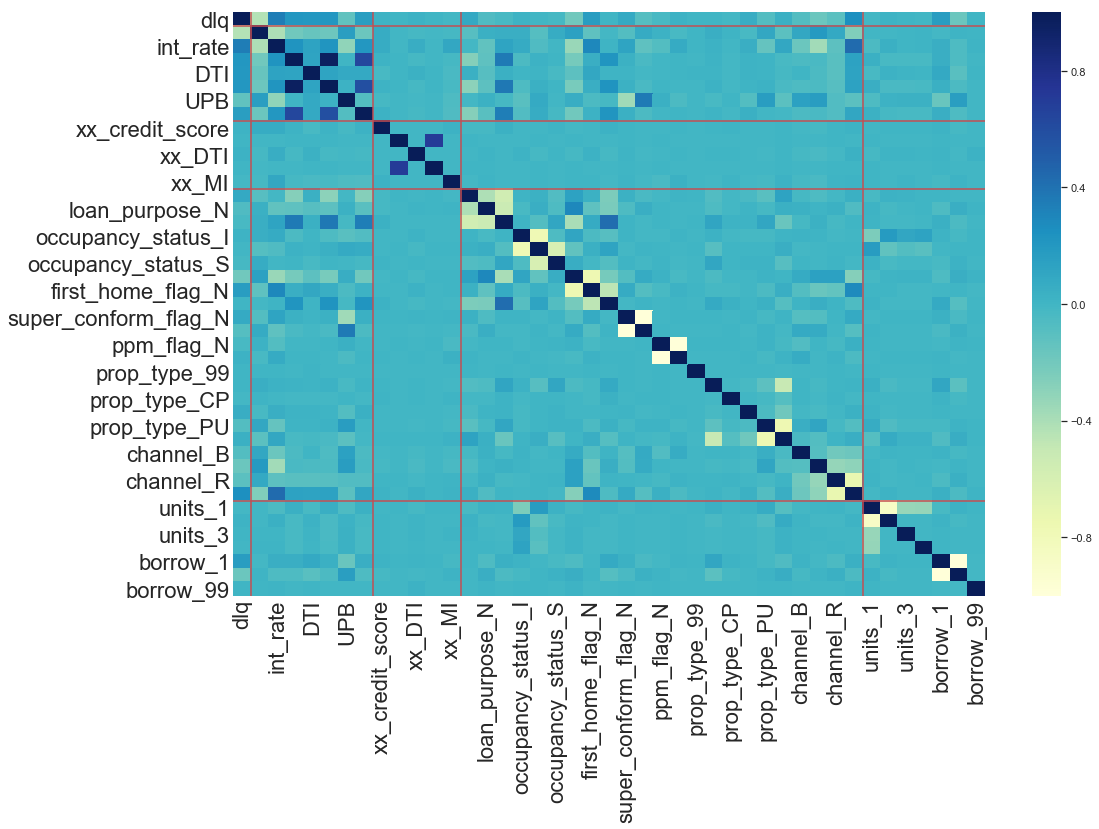

In [84]:
# View.
sns.set_style('white')
f, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale=1)

# Heatmap.
sns.heatmap(corr, annot=False, square=False, cmap='YlGnBu', annot_kws={'size': 10})

# Placing lines to group the features by type.
ax.hlines([1, 8, 13, 36], *ax.get_xlim(), colors='r')
ax.vlines([1, 8, 13, 36], *ax.get_ylim(), colors='r')
plt.show()

In [85]:
corr_dlq = corr['dlq'].sort_values(ascending=False)
corr_dlq

dlq                     1.000000e+00
int_rate                3.469156e-01
channel_T               2.526848e-01
CLTV                    2.092684e-01
LTV                     2.069066e-01
DTI                     1.997515e-01
first_home_flag_N       1.708700e-01
borrow_1                1.692430e-01
MI                      1.630807e-01
loan_purpose_C          8.875933e-02
super_conform_flag_N    7.922030e-02
prop_type_MH            5.477175e-02
prop_type_SF            4.586687e-02
xx_DTI                  2.925987e-02
ppm_flag_Y              2.859643e-02
occupancy_status_I      1.753369e-02
xx_credit_score         1.709409e-02
units_2                 1.702864e-02
prop_type_CO            7.790287e-03
units_3                 5.020027e-03
xx_CLTV                 4.973401e-03
xx_LTV                  3.516704e-03
borrow_99               2.030508e-03
first_home_flag_Y       1.850995e-03
prop_type_99            6.861523e-18
occupancy_status_P     -9.171901e-04
units_4                -3.485651e-03
p

Interest rate, Third Party Origination (where Seller doesn't specify Broker or Correspondent in the disclosure), CLTV & LTV, and DTI were 5 most correlated features to the outcome of a missed mortgage payment. 

The 5 least correlated features related to the outcome of a missed mortgage payment are: Credit Score, unknown information on whether or not borrower is a First-Time-Homebuyer, Correspondent channel, 2 borrowers on a loan, and UPB.

## PCA

In [86]:
# Assigning vars for PCA.
pca_features = final_dummies.iloc[:, 1:]
pca_target = final_dummies.iloc[:, 0]

In [87]:
print(pca_features.shape)
print(pca_target.shape)

(80860, 42)
(80860,)


In [88]:
# Transpose for covariance function.
Xt = pca_features.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

# Eigenvalues, Eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspect.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 42).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')
    
print('The percentage of total variance in the dataset explained by',
      'each component calculated by hand.\n', eig_val_cov / sum(eig_val_cov))

Covariance Matrix:
 [[ 1.27168530e+00 -4.39525797e-01 -2.01191053e-01 ... -4.89394909e-03
   4.87493056e-03  1.90185359e-05]
 [-4.39525797e-01  9.00850097e-01  2.04848600e-01 ...  2.47587198e-02
  -2.48546098e-02  9.58900010e-05]
 [-2.01191053e-01  2.04848600e-01  8.78514257e-01 ...  2.50857580e-02
  -2.50584389e-02 -2.73191717e-05]
 ...
 [-4.89394909e-03  2.47587198e-02  2.50857580e-02 ...  2.49966967e-01
  -2.49893655e-01 -7.33112621e-05]
 [ 4.87493056e-03 -2.48546098e-02 -2.50584389e-02 ... -2.49893655e-01
   2.49968729e-01 -7.50731991e-05]
 [ 1.90185359e-05  9.58900010e-05 -2.73191717e-05 ... -7.33112621e-05
  -7.50731991e-05  1.48384461e-04]]
Eigenvector 1: 
[[-3.12915106e-01]
 [ 2.82575240e-01]
 [ 4.87142008e-01]
 [ 1.49790851e-01]
 [ 4.76513383e-01]
 [-8.47953598e-02]
 [ 5.31432149e-01]
 [ 6.30811512e-04]
 [-8.28761136e-07]
 [ 1.17595178e-05]
 [ 3.52266672e-06]
 [-8.19064261e-04]
 [-7.12263701e-02]
 [-4.60856595e-02]
 [ 1.17312030e-01]
 [-6.79098884e-03]
 [ 8.97660436e-03]
 [-2.

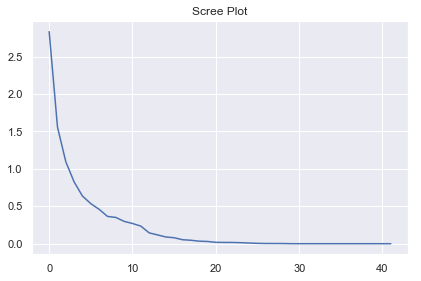

In [89]:
# How many components to keep? 11 from scree plot.
# Keep alll the components whose eigenvalue falls above the point
# where the slope of the line changes the most drastically, also
# called the "elbow".
plt.plot(eig_val_cov)
plt.title('Scree Plot')
plt.show()

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


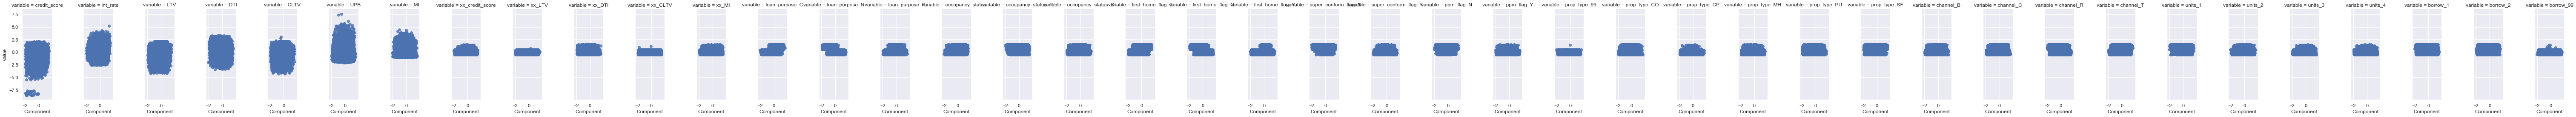

In [90]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 10]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = pca_features.iloc[:]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col='variable', size=4, aspect=.5)
g = g.map(sns.regplot, 'Component', 'value', x_jitter=.49,
          y_jitter=.49, fit_reg=False)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.27946455 0.15367452 0.10789989 0.08128318 0.06273051 0.0527554
 0.04526998 0.03597257 0.03460003 0.02941007 0.02663427]


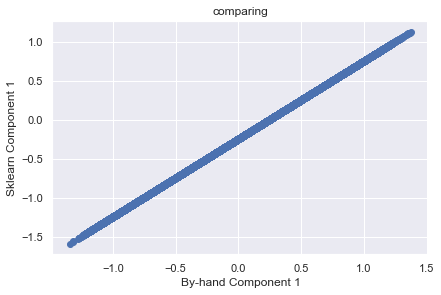

In [91]:
sklearn_pca = PCA(n_components = 11)
Y_sklearn = sklearn_pca.fit_transform(pca_features)

print('The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

# Compare the sklearn solution to ours.
plt.plot(Y_sklearn[:, 10], Y, 'o')
plt.title('comparing')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

(80860, 43)
(80860, 11)


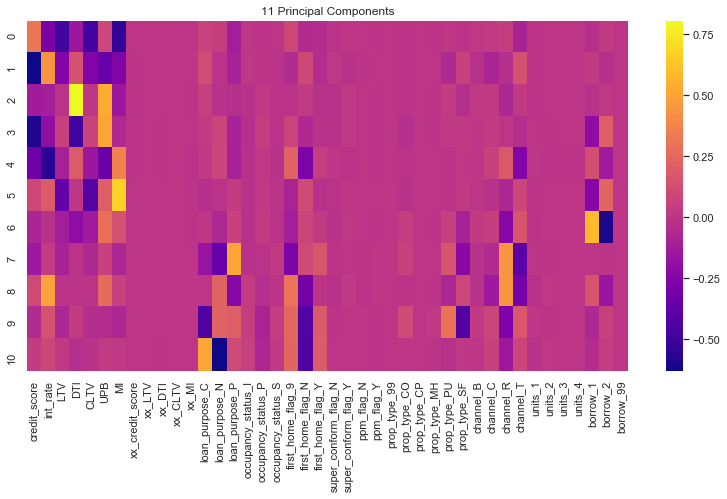

In [92]:
# Specify the number of components want to keep.
pca = PCA(n_components = 11)
pca.fit(pca_features)
x_pca = pca.transform(pca_features)
print(final_dummies.shape)
print(x_pca.shape)

# Heatmap.
df_pca_comp = pd.DataFrame(pca.components_, columns=pca_features.columns)
plt.figure(figsize=(12, 6))
sns.heatmap(df_pca_comp, cmap='plasma')
plt.title('11 Principal Components')
plt.show()

In above heatmap, each row represents an individual component from the 11 our scree plot hinted we keep. Each column is represented by our features.

## model_df

In [93]:
# Rename for modeling.
model_df = final_dummies
model_df.head()

,dlq,credit_score,int_rate,LTV,DTI,CLTV,UPB,MI,xx_credit_score,xx_LTV,...,channel_C,channel_R,channel_T,units_1,units_2,units_3,units_4,borrow_1,borrow_2,borrow_99
34088,0,0.974139,-1.496976,-0.050535,-0.432025,-0.113481,-0.930122,-0.479279,0,0,...,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
25613,1,-4.445205,-0.089921,1.314334,1.186294,1.233354,0.627937,2.407046,0,0,...,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44225,1,0.380238,0.701548,1.670387,0.826667,1.584702,0.136912,2.888100,0,0,...,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6737,0,-0.325019,-0.881389,0.127492,0.556947,0.062194,-1.118978,-0.479279,0,0,...,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
47867,1,-2.106721,0.877430,-1.237377,-1.600811,-1.284641,-1.071764,-0.479279,0,0,...,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Assign X & Y

In [94]:
# Assign vars for target & features.
feature_cols = model_df.iloc[:, 1:].columns
target = model_df['dlq']

In [95]:
feature_cols

Index(['credit_score', 'int_rate', 'LTV', 'DTI', 'CLTV', 'UPB', 'MI',
       'xx_credit_score', 'xx_LTV', 'xx_DTI', 'xx_CLTV', 'xx_MI',
       'loan_purpose_C', 'loan_purpose_N', 'loan_purpose_P',
       'occupancy_status_I', 'occupancy_status_P', 'occupancy_status_S',
       'first_home_flag_9', 'first_home_flag_N', 'first_home_flag_Y',
       'super_conform_flag_N', 'super_conform_flag_Y', 'ppm_flag_N',
       'ppm_flag_Y', 'prop_type_99', 'prop_type_CO', 'prop_type_CP',
       'prop_type_MH', 'prop_type_PU', 'prop_type_SF', 'channel_B',
       'channel_C', 'channel_R', 'channel_T', 'units_1', 'units_2', 'units_3',
       'units_4', 'borrow_1', 'borrow_2', 'borrow_99'],
      dtype='object')

### Split to train & test sets

In [96]:
# 75/25 train/test split.
train, test = train_test_split(model_df, test_size=0.25, random_state = 42)
X_test = test[feature_cols]
Y_test = test['dlq']
X_train = train[feature_cols]
Y_train = train['dlq']

# Models

In [97]:
# Defining the KNN Classifier function.
def run_knn():
    start_time = time.time()
    # Declare the model.
    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    # Fit the model.
    knn.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = knn.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(knn, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(knn, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(knn.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(knn.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(knn, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(knn, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))
    
# Defining the Random Forest Classifier function.
def run_rfc():
    start_time = time.time()
    # Declare the model.
    rfc = RandomForestClassifier()
    # Fit the model.
    rfc.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = rfc.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(rfc, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(rfc, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(rfc.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(rfc.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(rfc, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(rfc, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))
    
# Defining the Logistic Regression Classifier function.
def run_logisticRegr():
    start_time = time.time()
    # Declare the model.
    lr = LogisticRegression()
    # Fit the model.
    lr.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = lr.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(lr, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(lr, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(lr.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(lr.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(lr, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(lr, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))
    
# Defining the Ridge Regression function.
def run_ridgeRegr():
    start_time = time.time()
    # Declare the model.
    ridge = LogisticRegression(penalty='l2')
    # Fit the model.
    ridge.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = ridge.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(ridge, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(ridge, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(ridge.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(ridge.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(ridge, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(ridge, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))
    
# Defining the Lasso Regression function.
def run_lassoRegr():
    start_time = time.time()
    # Declare the model.
    lasso = LogisticRegression(penalty='l1')
    # Fit the model.
    lasso.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = lasso.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(lasso, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(lasso, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(lasso.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(lasso.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(lasso, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(lasso, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))
    
# Defining the Gradient Boost function.
def run_gb():
    start_time = time.time()
    # Declare the model.
    clf = GradientBoostingClassifier(loss='deviance', n_estimators=500, max_depth = 2)
    # Fit the model.
    clf.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = clf.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(clf, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(clf, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(clf.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(clf.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(clf, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(clf, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))
    
# Defining the Support Vector Classifier function.
def run_svc():
    start_time = time.time()
    # Declare the model.
    svc = SVC()
    # Fit the model.
    svc.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = svc.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(svc, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(svc, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(svc.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(svc.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(svc, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(svc, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))

# Model Results

In [98]:
run_knn()

Time taken: 86.0 seconds

Training Set Accuracy:
0.8013026630389974

Testing Set Accuracy:
0.7160524363096711

Cross-Val Train Acc: 0.71 (+/- 0.01)

Cross-Val Test Acc: 0.71 (+/- 0.02)

Confusion Matrix:
[[7116 3035]
 [2705 7359]]

Sensitivity:  73.12201907790143 %

Specificity:  70.10146783568122 %

F1 Score:  0.7194251637501222

Cross-Val Train AUC: 0.77 (+/- 0.01)

Cross-Val Test AUC: 0.76 (+/- 0.02)

AUC:  0.716


In [99]:
run_rfc()

Time taken: 10.0 seconds

Training Set Accuracy:
0.9848132574820677

Testing Set Accuracy:
0.718179569626515

Cross-Val Train Acc: 0.72 (+/- 0.01)

Cross-Val Test Acc: 0.71 (+/- 0.01)

Confusion Matrix:
[[7506 2645]
 [3052 7012]]

Sensitivity:  69.67408585055644 %

Specificity:  73.94345384691164 %

F1 Score:  0.7111201257542721

Cross-Val Train AUC: 0.78 (+/- 0.01)

Cross-Val Test AUC: 0.78 (+/- 0.01)

AUC:  0.718


In [100]:
run_logisticRegr()

Time taken: 8.6 seconds

Training Set Accuracy:
0.7435402753730728

Testing Set Accuracy:
0.7415285678951273

Cross-Val Train Acc: 0.74 (+/- 0.01)

Cross-Val Test Acc: 0.74 (+/- 0.02)

Confusion Matrix:
[[7344 2807]
 [2418 7646]]

Sensitivity:  75.9737678855326 %

Specificity:  72.34755196532362 %

F1 Score:  0.7453331383730564

Cross-Val Train AUC: 0.82 (+/- 0.01)

Cross-Val Test AUC: 0.81 (+/- 0.02)

AUC:  0.742


In [101]:
run_ridgeRegr()

Time taken: 8.8 seconds

Training Set Accuracy:
0.7435402753730728

Testing Set Accuracy:
0.7415285678951273

Cross-Val Train Acc: 0.74 (+/- 0.01)

Cross-Val Test Acc: 0.74 (+/- 0.02)

Confusion Matrix:
[[7344 2807]
 [2418 7646]]

Sensitivity:  75.9737678855326 %

Specificity:  72.34755196532362 %

F1 Score:  0.7453331383730564

Cross-Val Train AUC: 0.82 (+/- 0.01)

Cross-Val Test AUC: 0.81 (+/- 0.02)

AUC:  0.742


In [102]:
run_lassoRegr()

Time taken: 68.9 seconds

Training Set Accuracy:
0.7435897435897436

Testing Set Accuracy:
0.7416275043284689

Cross-Val Train Acc: 0.74 (+/- 0.01)

Cross-Val Test Acc: 0.74 (+/- 0.02)

Confusion Matrix:
[[7346 2805]
 [2418 7646]]

Sensitivity:  75.9737678855326 %

Specificity:  72.3672544576889 %

F1 Score:  0.7454058006336827

Cross-Val Train AUC: 0.82 (+/- 0.01)

Cross-Val Test AUC: 0.81 (+/- 0.02)

AUC:  0.742


In [103]:
run_gb()

Time taken: 247.6 seconds

Training Set Accuracy:
0.7585786132409926

Testing Set Accuracy:
0.7515706158792975

Cross-Val Train Acc: 0.75 (+/- 0.01)

Cross-Val Test Acc: 0.75 (+/- 0.01)

Confusion Matrix:
[[7276 2875]
 [2147 7917]]

Sensitivity:  78.66653418124007 %

Specificity:  71.67766722490396 %

F1 Score:  0.7592059838895282

Cross-Val Train AUC: 0.83 (+/- 0.01)

Cross-Val Test AUC: 0.82 (+/- 0.01)

AUC:  0.752


In [104]:
run_svc()

Time taken: 3276.2 seconds

Training Set Accuracy:
0.752625937834941

Testing Set Accuracy:
0.748651991095721

Cross-Val Train Acc: 0.75 (+/- 0.01)

Cross-Val Test Acc: 0.75 (+/- 0.02)

Confusion Matrix:
[[6973 3178]
 [1903 8161]]

Sensitivity:  81.09101748807632 %

Specificity:  68.6927396315634 %

F1 Score:  0.762603373358875

Cross-Val Train AUC: 0.82 (+/- 0.01)

Cross-Val Test AUC: 0.82 (+/- 0.01)

AUC:  0.749


# Hyperparameter Tuning

In [105]:
# Models.
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression()
ridge = LogisticRegression(penalty='l2')
lasso = LogisticRegression(penalty='l1')
clf = GradientBoostingClassifier()
svc = SVC()

# View baseline parameters.
models = [knn, rfc, lr, ridge, lasso, clf, svc]
for mod in models:
    print(mod)

# Sklearn's Randomized Search on hyper-parameters.
def randomSearchCV(model, parameters):
    start_time = time.time()
    from sklearn.model_selection import RandomizedSearchCV
    rgrid = RandomizedSearchCV(model, parameters, random_state=42, scoring='roc_auc')
    rgrid.fit(X_train, Y_train)
    print('Parameters via tuning: \n', rgrid.best_params_)
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,

In [122]:
# For ridge & lasso models.
def gridSearchCV(model, parameters):
    start_time = time.time()
    from sklearn.model_selection import GridSearchCV
    sgrid = GridSearchCV(model, parameters, scoring='roc_auc')
    sgrid.fit(X_train, Y_train)
    print('Parameters via tuning: \n', sgrid.best_params_)
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))

In [115]:
# Parameter tuning.
params_knn = {'n_neighbors': [3, 5, 7],
          'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree'],
          'leaf_size': [20, 30, 40]}
params_rfc = {'n_estimators': [50, 100, 150],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 3, 5]}
params_lr = {'max_iter': [10, 20, 30],
             'C': [0.01, 0.1, 1, 5, 10]}
params_ridge = {'penalty': ['l2'],
                'C': [0.01, 0.1, 1, 5, 10]}
params_lasso = {'penalty': ['l1'],
                'C': [0.01, 0.1, 1, 5, 10]}
#params_clf = {'loss': ['deviance', 'exponential'],
#              'n_estimators': [100, 250, 500],
#              'max_depth': [2, 3, 4]}
#params_svc = {'C': [0.01, 0.1, 1],
#              'gamma': [0.01, 0.1, 1]}

In [108]:
print('KNN:\n', randomSearchCV(knn, params_knn))

Parameters via tuning: 
 {'weights': 'uniform', 'n_neighbors': 7, 'leaf_size': 40, 'algorithm': 'kd_tree'}
Time taken: 2242.9 seconds
KNN:
 None


In [109]:
print('RFC:\n', randomSearchCV(rfc, params_rfc))

Parameters via tuning: 
 {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 15}
Time taken: 62.4 seconds
RFC:
 None


In [110]:
print('Logistic:\n', randomSearchCV(lr, params_lr))

Parameters via tuning: 
 {'max_iter': 10, 'C': 5}
Time taken: 14.2 seconds
Logistic:
 None


In [123]:
print('Ridge:\n', gridSearchCV(ridge, params_ridge))

Parameters via tuning: 
 {'C': 5, 'penalty': 'l2'}
Time taken: 8.4 seconds
Ridge:
 None


In [125]:
print('Lasso:\n', gridSearchCV(lasso, params_lasso))

Parameters via tuning: 
 {'C': 1, 'penalty': 'l1'}
Time taken: 39.2 seconds
Lasso:
 None


In [126]:
# Computer runtime...
#print('GB:\n', randomSearchCV(clf, params_clf))

In [127]:
# Computer runtime...
#print('\nSVC:', randomSearchCV(SVC, params_svc))

In [128]:
# Use optimal parameters.

# KNN.
def try_knn():
    start_time = time.time()
    # Declare the model.
    knn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='kd_tree', leaf_size=40)
    # Fit the model.
    knn.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = knn.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(knn, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(knn, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(knn.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(knn.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTrain.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(knn, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(knn, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))

# RFC.
def try_rfc():
    start_time = time.time()
    # Declare the model.
    rfc = RandomForestClassifier(n_estimators=100, max_depth=15,
                                 min_samples_split=6, min_samples_leaf=3)
    # Fit the model.
    rfc.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = rfc.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(rfc, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(rfc, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(rfc.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(rfc.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(rfc, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(rfc, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))
    
# Logistic Regression.
def try_logisticRegr():
    start_time = time.time()
    # Declare the model.
    lr = LogisticRegression(max_iter=10, C=5)
    # Fit the model.
    lr.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = lr.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(lr, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(lr, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(lr.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(lr.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(lr, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(lr, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))
    
# Ridge Regression.
def try_ridgeRegr():
    start_time = time.time()
    # Declare the model.
    ridge = LogisticRegression(penalty='l2', C=5)
    # Fit the model.
    ridge.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = ridge.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(ridge, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(ridge, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(ridge.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(ridge.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(ridge, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(ridge, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))

# Lasso Regression.
def try_lassoRegr():
    start_time = time.time()
    # Declare the model.
    lasso = LogisticRegression(penalty='l1', C=1)
    # Fit the model.
    lasso.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = lasso.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(lasso, X_train, Y_train, cv=10)
    cvScoreTest = cross_val_score(lasso, X_test, Y_test, cv=10)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(lasso.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(lasso.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTrain.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    # Confusion, Sensitivity, Specificity.
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))
    confmatrix = confusion_matrix(Y_test, y_pred)
    sensativityVal = 100*confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
    specificityVal = 100*confmatrix[0,0]/(confmatrix[0,0]+confmatrix[0,1])
    print('\nSensitivity: ', sensativityVal, '%')
    print('\nSpecificity: ', specificityVal, '%')
    # F1 Scores.
    print('\nF1 Score: ', f1_score(Y_test, y_pred))
    # Cross-Validation Area under ROC.
    auroc_train = cross_val_score(lasso, X_train, Y_train, cv=10, scoring='roc_auc')
    auroc_test = cross_val_score(lasso, X_test, Y_test, cv=10, scoring='roc_auc')
    print('\nCross-Val Train AUC: %.2f (+/- %.2f)' %(auroc_train.mean(), auroc_train.std() * 2))
    print('\nCross-Val Test AUC: %.2f (+/- %.2f)' %(auroc_test.mean(), auroc_test.std() * 2))
    # AUC.
    print('\nAUC: ', round(roc_auc_score(Y_test, y_pred), 3))

# Model Results with tuning

In [129]:
try_knn()

Time taken: 126.8 seconds

Training Set Accuracy:
0.7858191112210405

Testing Set Accuracy:
0.7208013851100668

Cross-Val Train Acc: 0.72 (+/- 0.01)

Cross-Val Test Acc: 0.72 (+/- 0.01)

Confusion Matrix:
[[7097 3054]
 [2590 7474]]

Sensitivity:  74.26470588235294 %

Specificity:  69.914294158211 %

F1 Score:  0.7259129759129758

Cross-Val Train AUC: 0.78 (+/- 0.01)

Cross-Val Test AUC: 0.78 (+/- 0.02)

AUC:  0.721


In [130]:
try_rfc()

Time taken: 59.9 seconds

Training Set Accuracy:
0.8103553466897518

Testing Set Accuracy:
0.7497402918624784

Cross-Val Train Acc: 0.75 (+/- 0.01)

Cross-Val Test Acc: 0.75 (+/- 0.01)

Confusion Matrix:
[[7103 3048]
 [2011 8053]]

Sensitivity:  80.01788553259142 %

Specificity:  69.97340163530687 %

F1 Score:  0.7609733049846444

Cross-Val Train AUC: 0.82 (+/- 0.01)

Cross-Val Test AUC: 0.82 (+/- 0.01)

AUC:  0.75


In [131]:
try_logisticRegr()

Time taken: 9.0 seconds

Training Set Accuracy:
0.7435897435897436

Testing Set Accuracy:
0.7416275043284689

Cross-Val Train Acc: 0.74 (+/- 0.01)

Cross-Val Test Acc: 0.74 (+/- 0.02)

Confusion Matrix:
[[7346 2805]
 [2418 7646]]

Sensitivity:  75.9737678855326 %

Specificity:  72.3672544576889 %

F1 Score:  0.7454058006336827

Cross-Val Train AUC: 0.82 (+/- 0.01)

Cross-Val Test AUC: 0.81 (+/- 0.02)

AUC:  0.742


In [132]:
try_ridgeRegr()

Time taken: 9.0 seconds

Training Set Accuracy:
0.7435897435897436

Testing Set Accuracy:
0.7416275043284689

Cross-Val Train Acc: 0.74 (+/- 0.01)

Cross-Val Test Acc: 0.74 (+/- 0.02)

Confusion Matrix:
[[7346 2805]
 [2418 7646]]

Sensitivity:  75.9737678855326 %

Specificity:  72.3672544576889 %

F1 Score:  0.7454058006336827

Cross-Val Train AUC: 0.82 (+/- 0.01)

Cross-Val Test AUC: 0.81 (+/- 0.02)

AUC:  0.742


In [133]:
try_lassoRegr()

Time taken: 59.4 seconds

Training Set Accuracy:
0.7436062329953005

Testing Set Accuracy:
0.7415780361117982

Cross-Val Train Acc: 0.74 (+/- 0.01)

Cross-Val Test Acc: 0.74 (+/- 0.02)

Confusion Matrix:
[[7346 2805]
 [2419 7645]]

Sensitivity:  75.96383147853736 %

Specificity:  72.3672544576889 %

F1 Score:  0.7453446426830457

Cross-Val Train AUC: 0.82 (+/- 0.01)

Cross-Val Test AUC: 0.81 (+/- 0.02)

AUC:  0.742


In [134]:
#try_gb()

In [135]:
#try_svc()

# Model Comparison

Support Vector Classifier & Gradient Boost models were the top performers. Random Forest Classifier performed the worst, most likely due to the scaling in the model prep, as well as RFC sometimes has difficulty with continuous variables.

Ranking by F1 score:
1. Support Vector Classifier
2. Gradient Boost
3. Logistic Regression
4. Lasso Regression
5. Ridge Regression
6. KNN Classifier
7. Random Forest Classifier

Interestingly, while SVC had the highest sensitivity (ability to detect true positives), it had the lowest specificity (ability to detect true negatives). Gradient Boost (both with deviance and exponential loss functions) had the highest r-squared, followed by SVC. 

Post hyperparameter-tuning, Random Forest Classifier improved its F1 score to 0.76 which placed it ahead of vanilla, ridge, lasso regressions, as well as KNN. Hyperparameter tuning was not performed for gradient boost and support vector classifier due to prolonged runtime. 

# Conclusion

Predicting delinquent payments would be better served on more of a on-the-go method, opposed to just at origination. However, we are able to better classify based on a few key features: Interest Rate, LTV & DTI. We were able to view some of the underlying causes of delinquent payments and the dataset gives great insight into the trends pre-2007 Financial Crisis. These revealed delinquent borrowers were borrowing more than they should have, were doing so for investment purposes, & most concerning was lenders were not accurately checking the financial health of its borrowers.

# Future

Because of the great dataset, this model can be extended to include all instances, rather than just at origination. This can be useful to a lending institution to monitor the health of it's current loans. I'd further explore turning to regression modeling: Can we predict the number of payments to result in full default? As a % of LTV, can we predict a dollar-amount to result in default? Additionally, I would like to implement time-series & economic scenario analysis and test through various conditions.

# Please let me know of any areas for improvement. Thanks for reading!